In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\abhay\\Downloads\\train_FD001.csv")


# Understanding the dataset

In [4]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (20631, 27)


In [5]:
print(f"Sample data:\n{data.head()}")

Sample data:
   Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  -0.0007  -0.0004    100.0   518.67   641.82  1589.70   
1       1       2   0.0019  -0.0003    100.0   518.67   642.15  1591.82   
2       1       3  -0.0043   0.0003    100.0   518.67   642.35  1587.99   
3       1       4   0.0007   0.0000    100.0   518.67   642.35  1582.79   
4       1       5  -0.0019  -0.0002    100.0   518.67   642.37  1582.85   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1400.60    14.62  ...   2388.02   8138.62    8.4195      0.03       392   
1  1403.14    14.62  ...   2388.07   8131.49    8.4318      0.03       392   
2  1404.20    14.62  ...   2388.03   8133.23    8.4178      0.03       390   
3  1401.87    14.62  ...   2388.08   8133.83    8.3682      0.03       392   
4  1406.22    14.62  ...   2388.04   8133.80    8.4294      0.03       393   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0    

In [6]:
print(f"Missing values:\n{data.isnull().sum()}")

Missing values:
Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64


In [7]:
print(f"Data information:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            20631 non-null  int64  
 1   Cycles            20631 non-null  int64  
 2   Sensor1           20631 non-null  float64
 3   Sensor2           20631 non-null  float64
 4   Sensor3           20631 non-null  float64
 5   Sensor4           20631 non-null  float64
 6   Sensor5           20631 non-null  float64
 7   Sensor6           20631 non-null  float64
 8   Sensor7           20631 non-null  float64
 9   Sensor8           20631 non-null  float64
 10  Sensor9           20631 non-null  float64
 11  Sensor10          20631 non-null  float64
 12  Sensor11          20631 non-null  float64
 13  Sensor12          20631 non-null  float64
 14  Sensor13          20631 non-null  float64
 15  Sensor14          20631 non-null  float64
 16  Sensor15          20631 non-null  float6

In [8]:
# Descriptive statistics
print(f"Descriptive statistics:\n{data.describe()}")

Descriptive statistics:
             Engine        Cycles       Sensor1       Sensor2  Sensor3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

        Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-

# Data visualization

In [9]:
# Remove constant sensors
constant_sensors = [col for col in data.columns[2:-1] if data[col].nunique() == 1]
print(f"Constant sensors: {constant_sensors}")
data = data.drop(columns=constant_sensors)


Constant sensors: ['Sensor3', 'Sensor4', 'Sensor8', 'Sensor13', 'Sensor19', 'Sensor21', 'Sensor22']


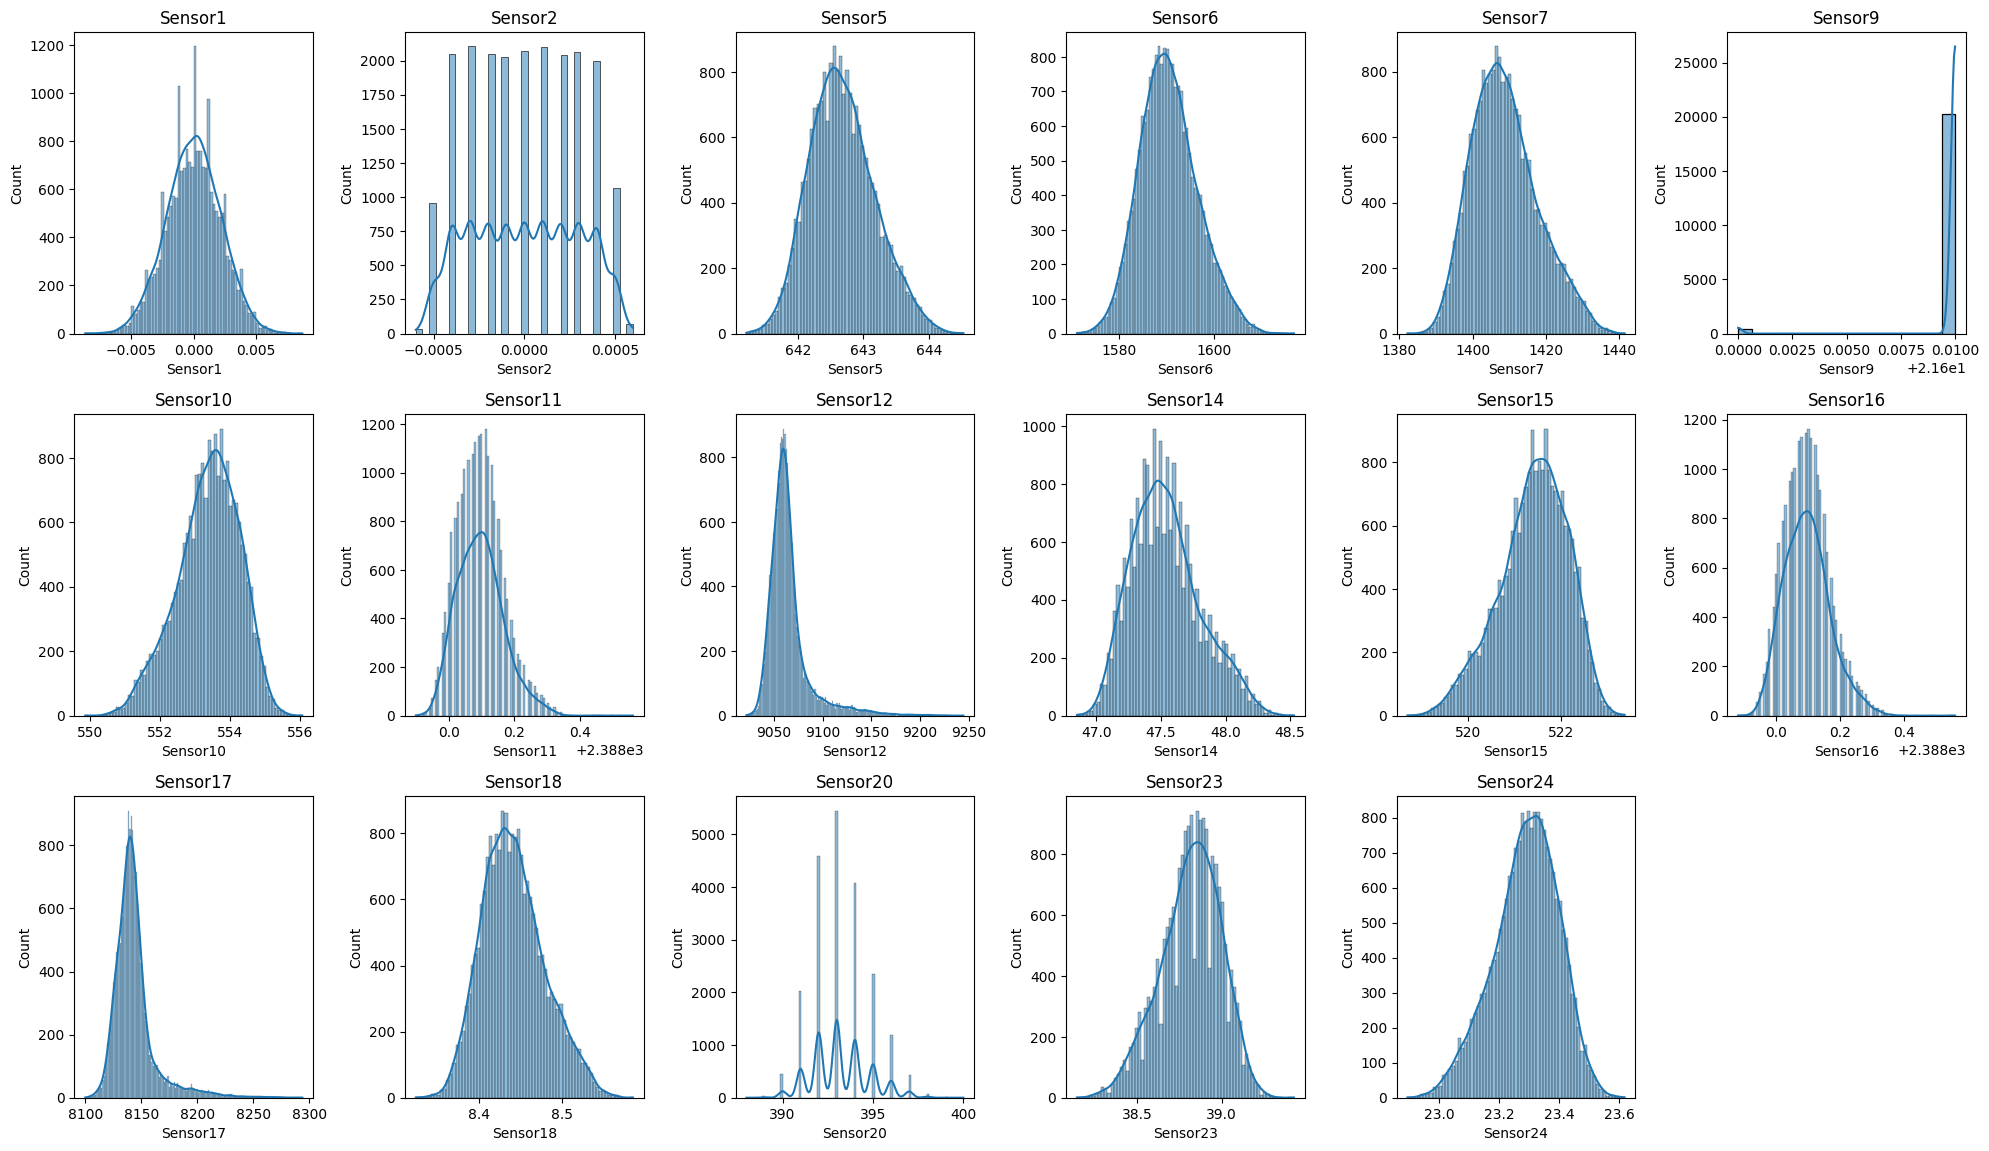

In [10]:
# Histograms for sensors
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns[2:-1]):
    plt.subplot(4, 6, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

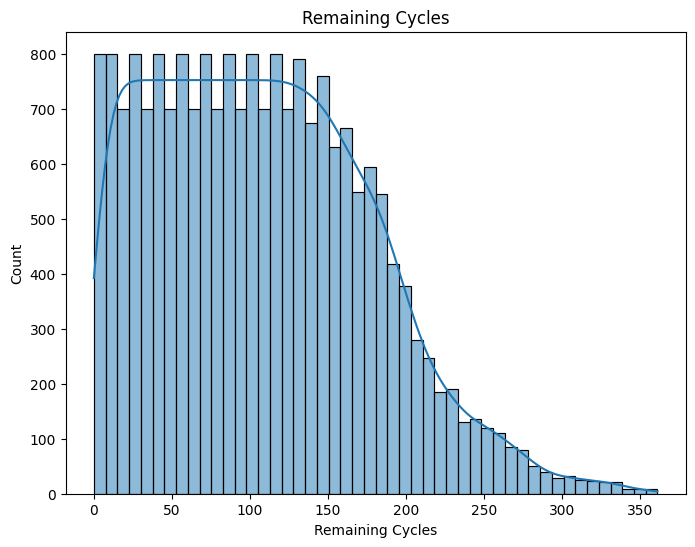

In [11]:
# Histogram for Remainig Cycles
plt.figure(figsize=(8, 6))
sns.histplot(data['Remaining Cycles'], kde=True)
plt.title('Remaining Cycles')
plt.show()

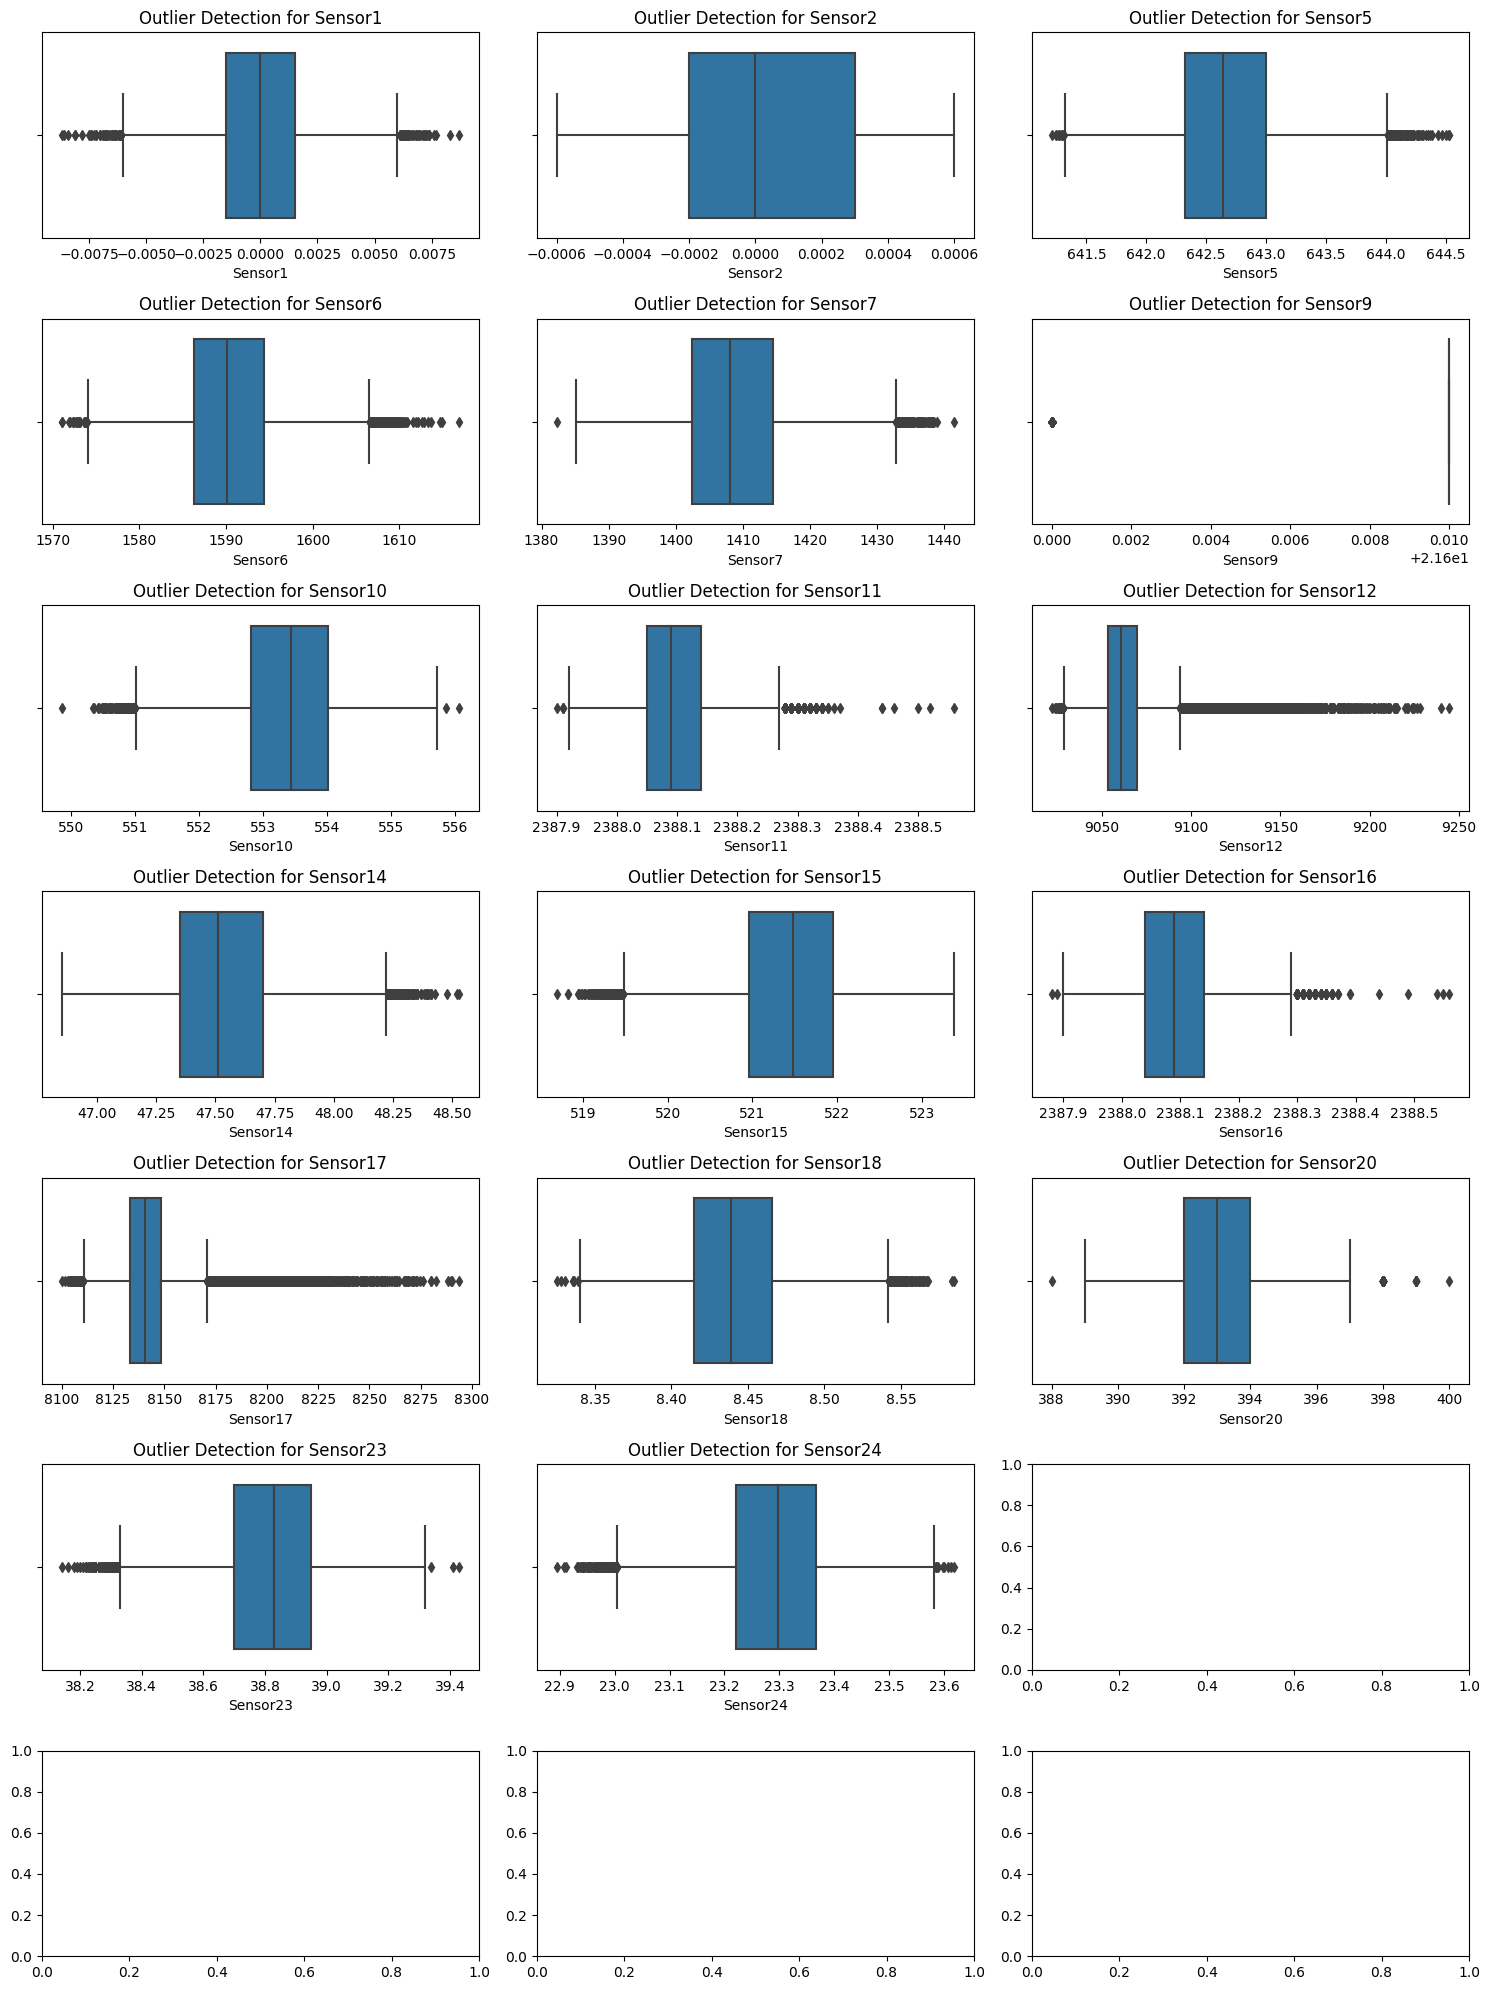

In [12]:
# Boxplots for sensors
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
axs = axs.ravel()
for i, col in enumerate(data.columns[2:-1]):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f"Outlier Detection for {col}")
plt.tight_layout()
plt.show()

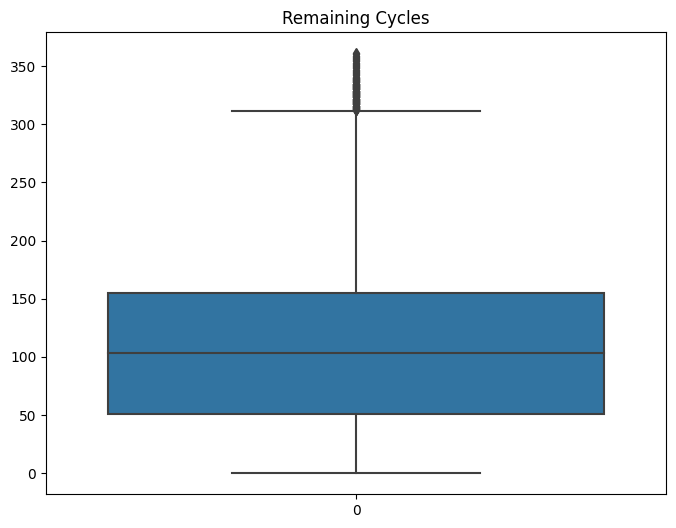

In [13]:
# Boxplot for Remaining Cycles
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Remaining Cycles'])
plt.title('Remaining Cycles')
plt.show()

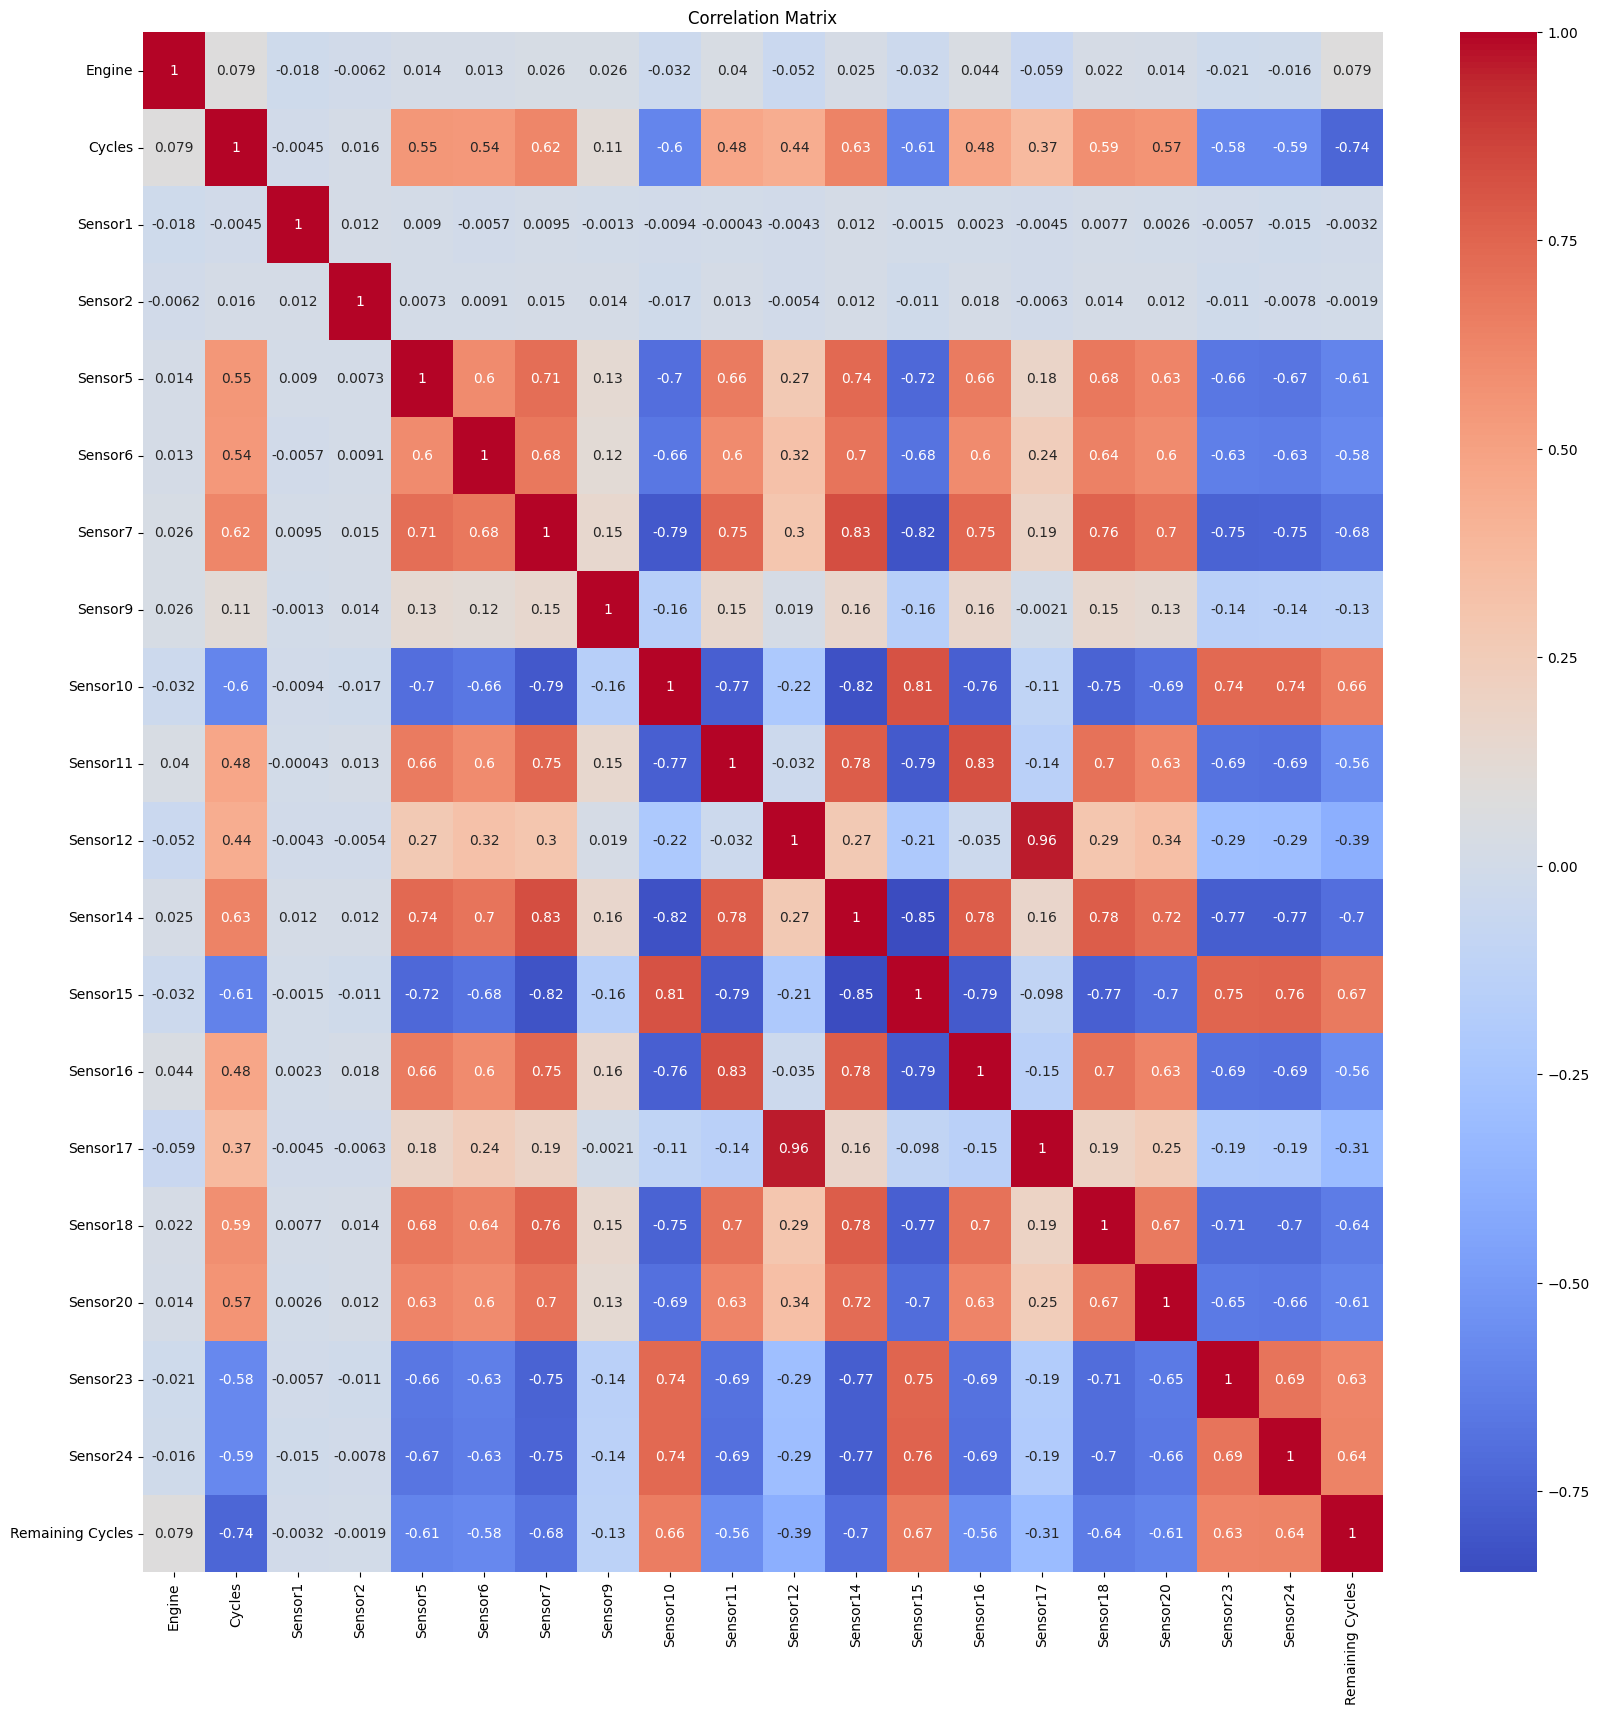

In [14]:
# Correlation matrix
plt.figure(figsize=(20, 20))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('Correlation matrix.png')
plt.show()

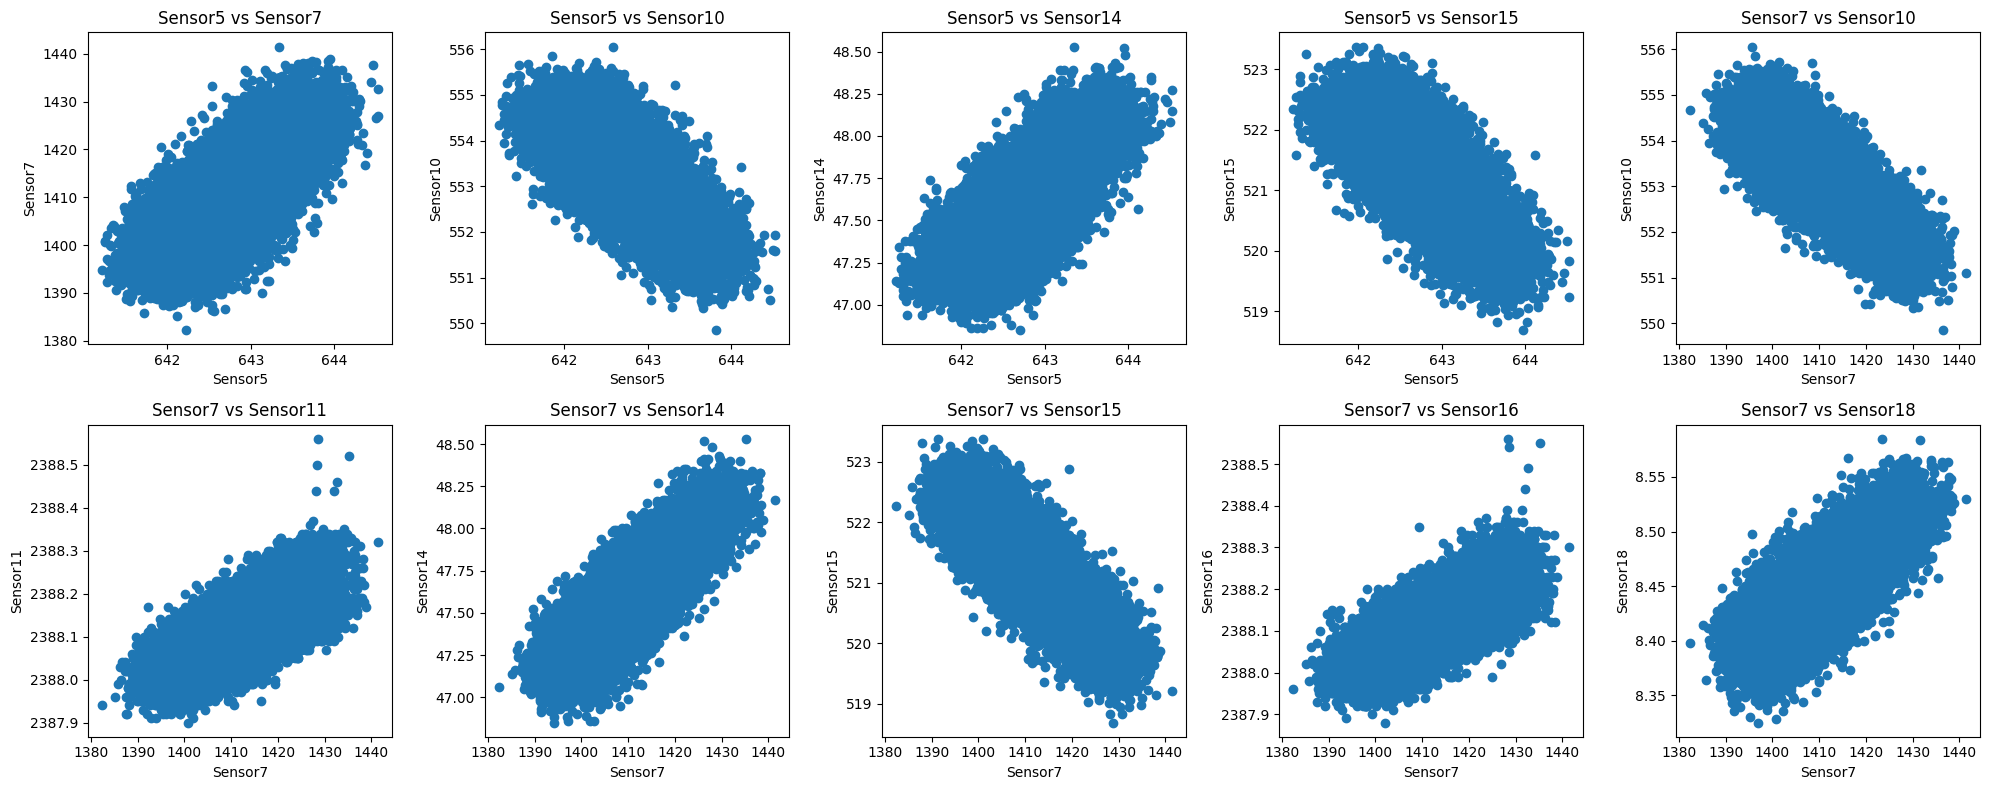

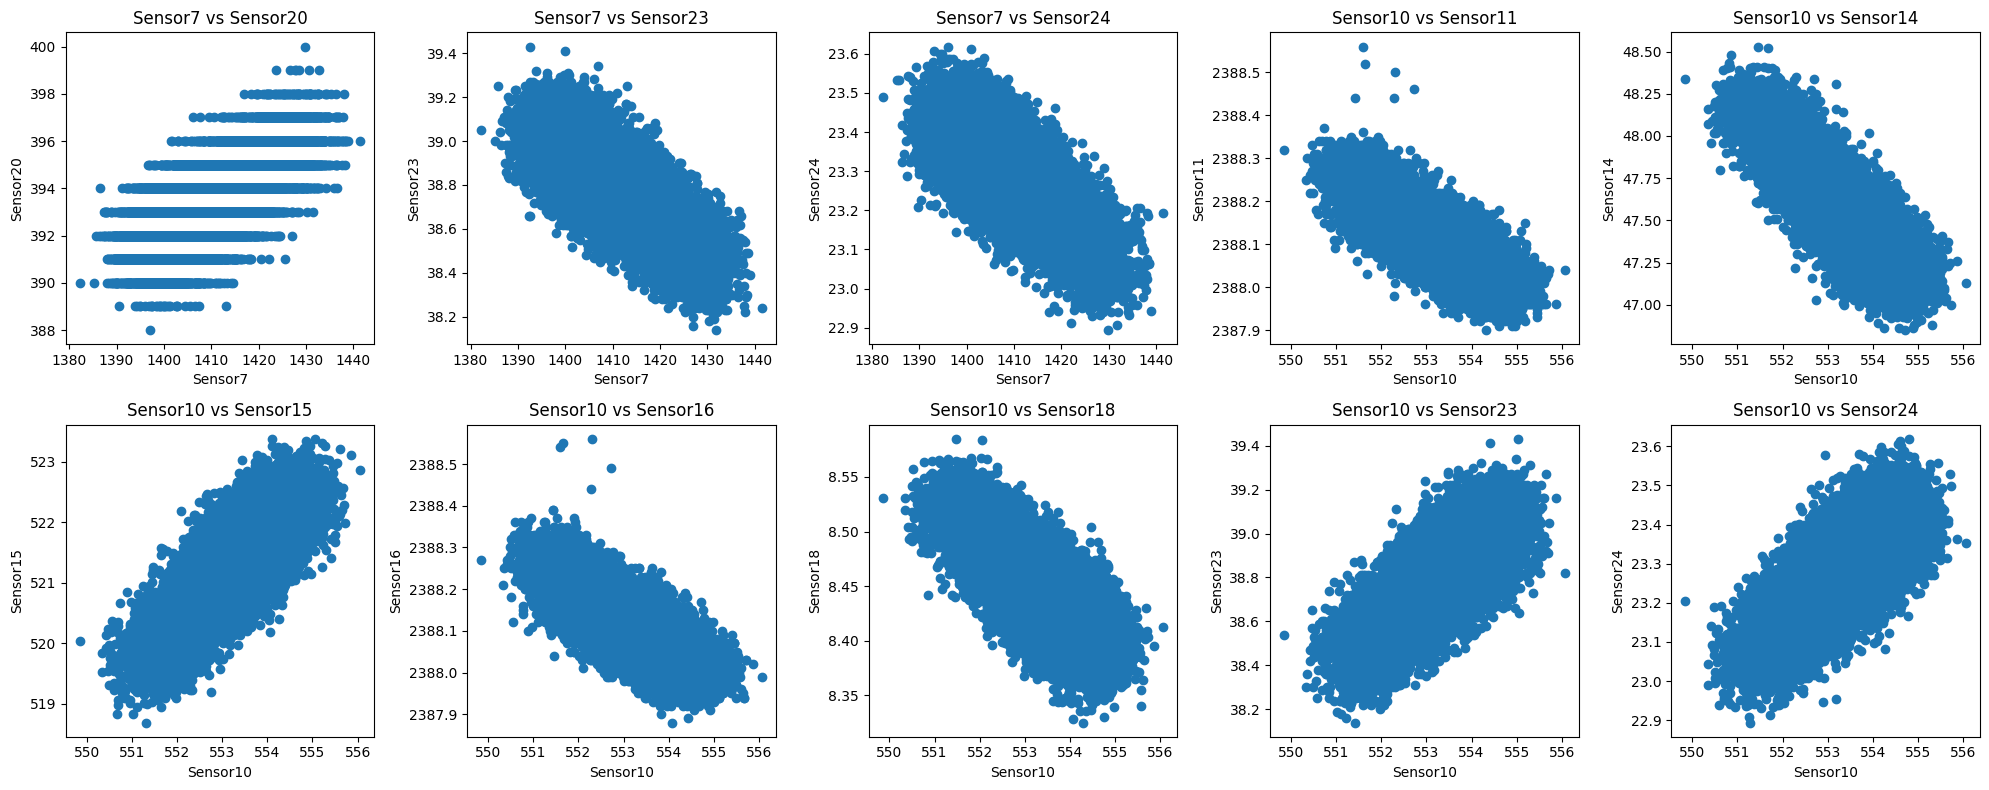

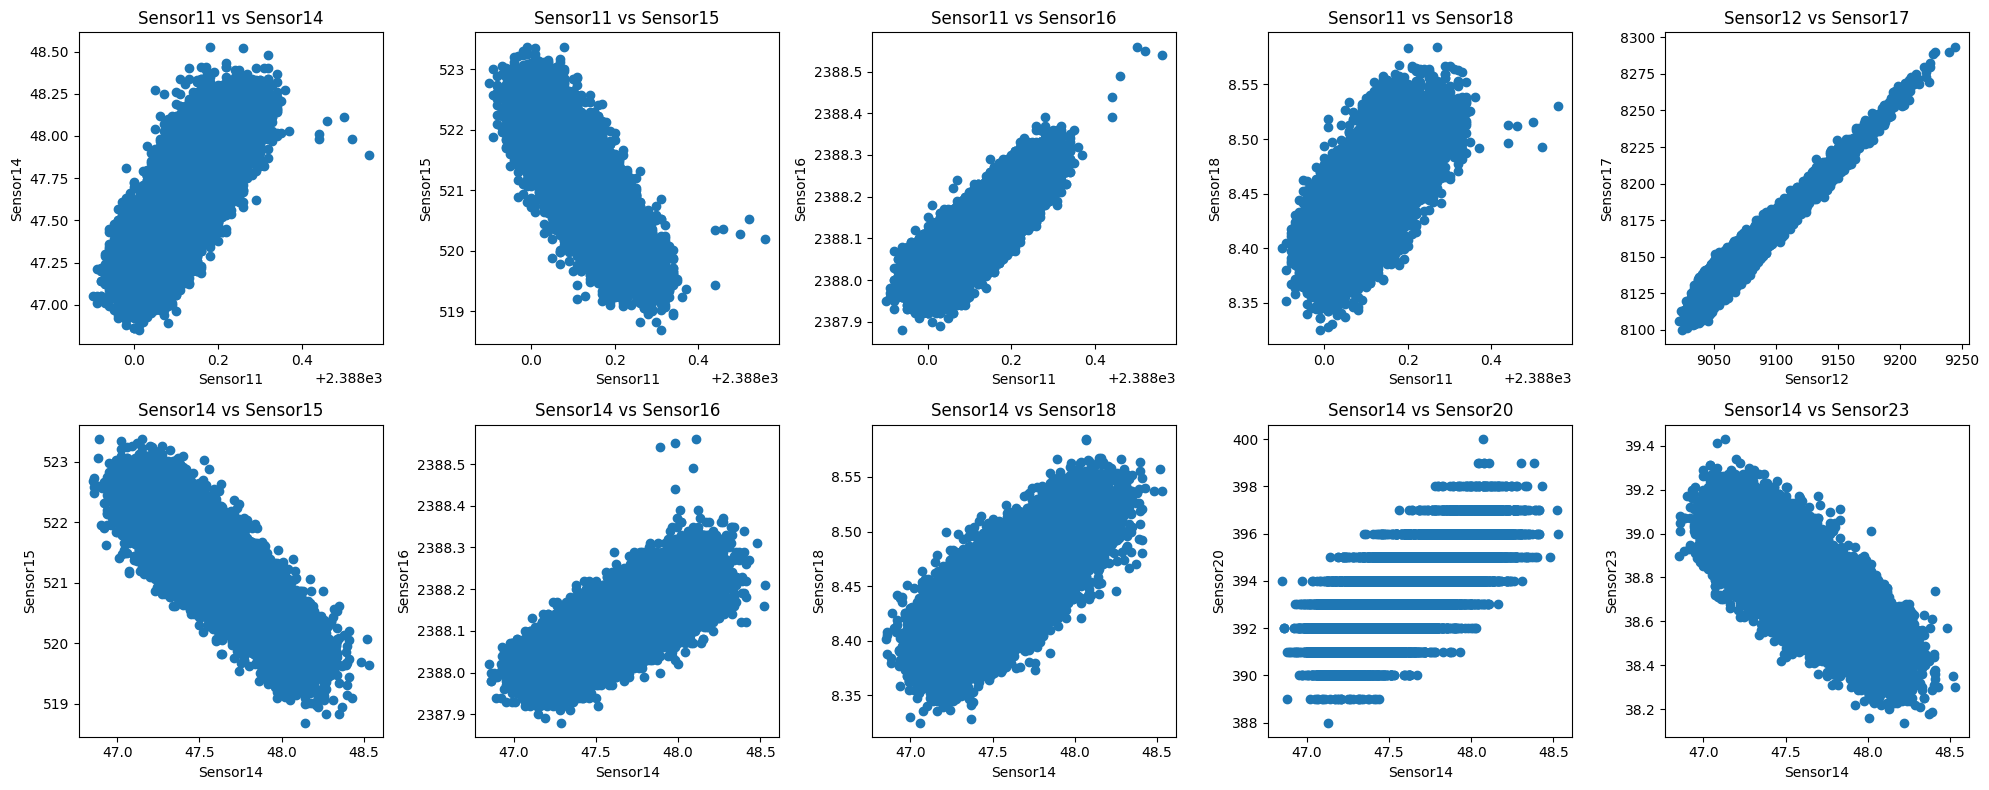

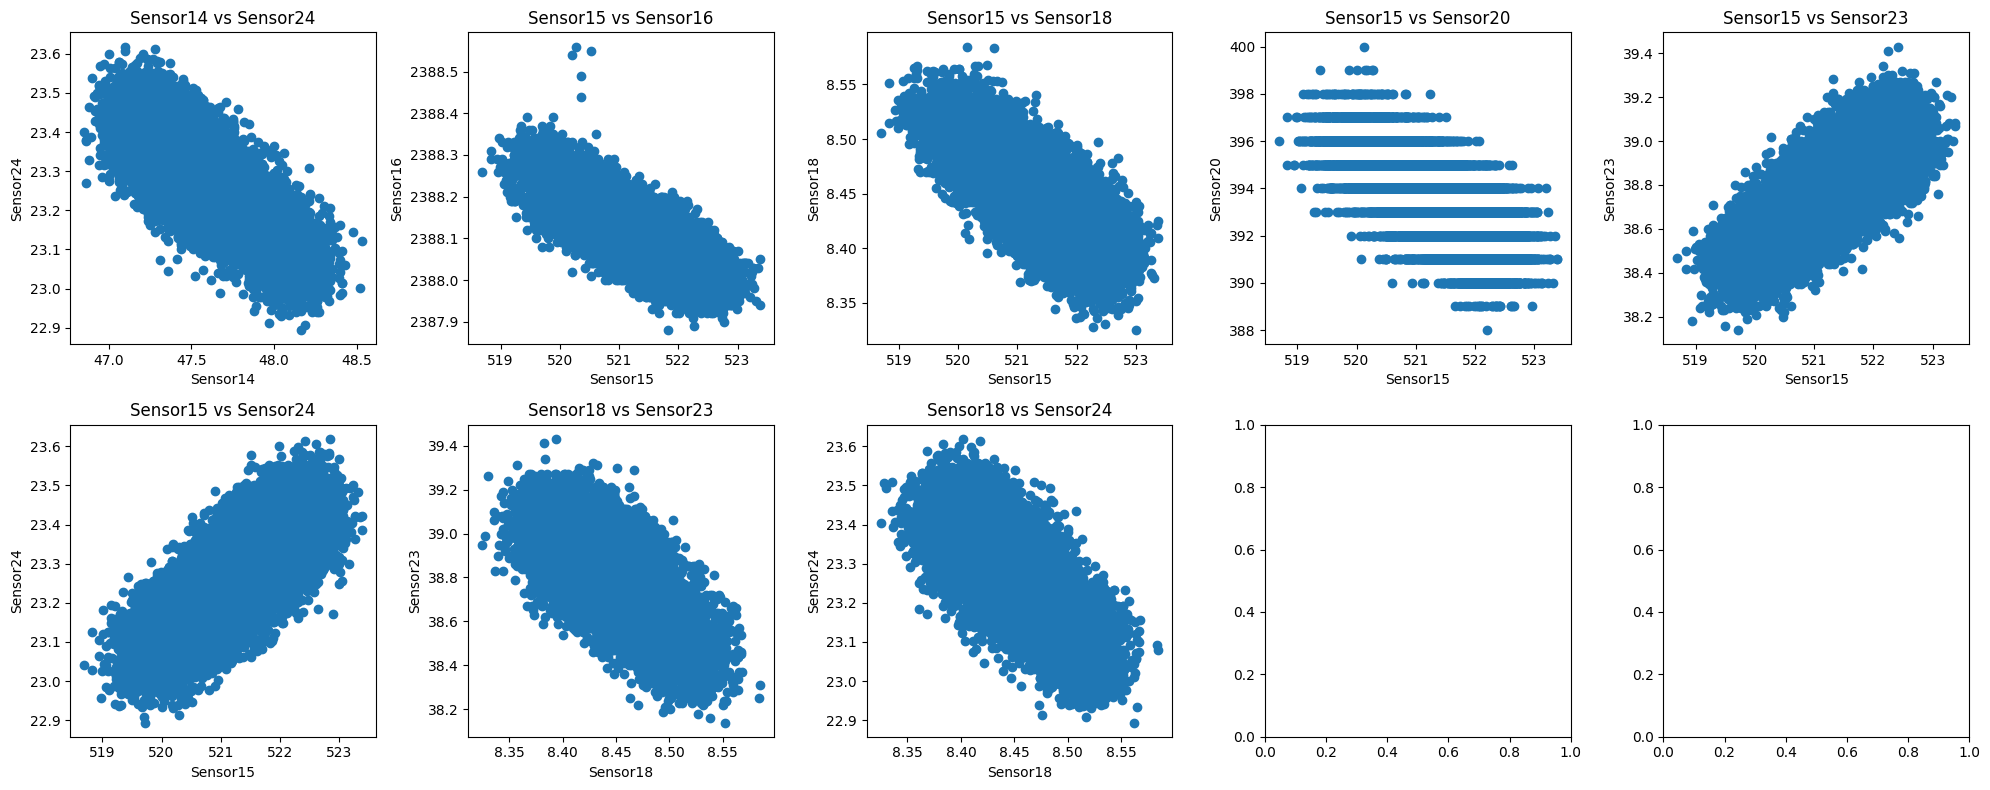

In [15]:
# Scatter plots for bivariate analysis based on Correlation Matrix Value.
corr_matrix = data.corr()
threshold = 0.7
sensors = data.columns[2:-1]  

# Pairs with correlation above threshold
pairs = [(sensor, other_sensor) for sensor in sensors for other_sensor in sensors if sensor != other_sensor and abs(corr_matrix.loc[sensor, other_sensor]) > threshold]

selected_pairs = []
for pair in pairs:
    if pair[::-1] not in selected_pairs:
        selected_pairs.append(pair)

# Scatter plots for sensor pairs
for j in range(0, len(selected_pairs), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()
    for i, (sensor, other_sensor) in enumerate(selected_pairs[j:j+10]):
        axs[i].scatter(data[sensor], data[other_sensor])
        axs[i].set_title(f'{sensor} vs {other_sensor}')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel(other_sensor)
    plt.tight_layout()
    plt.show()

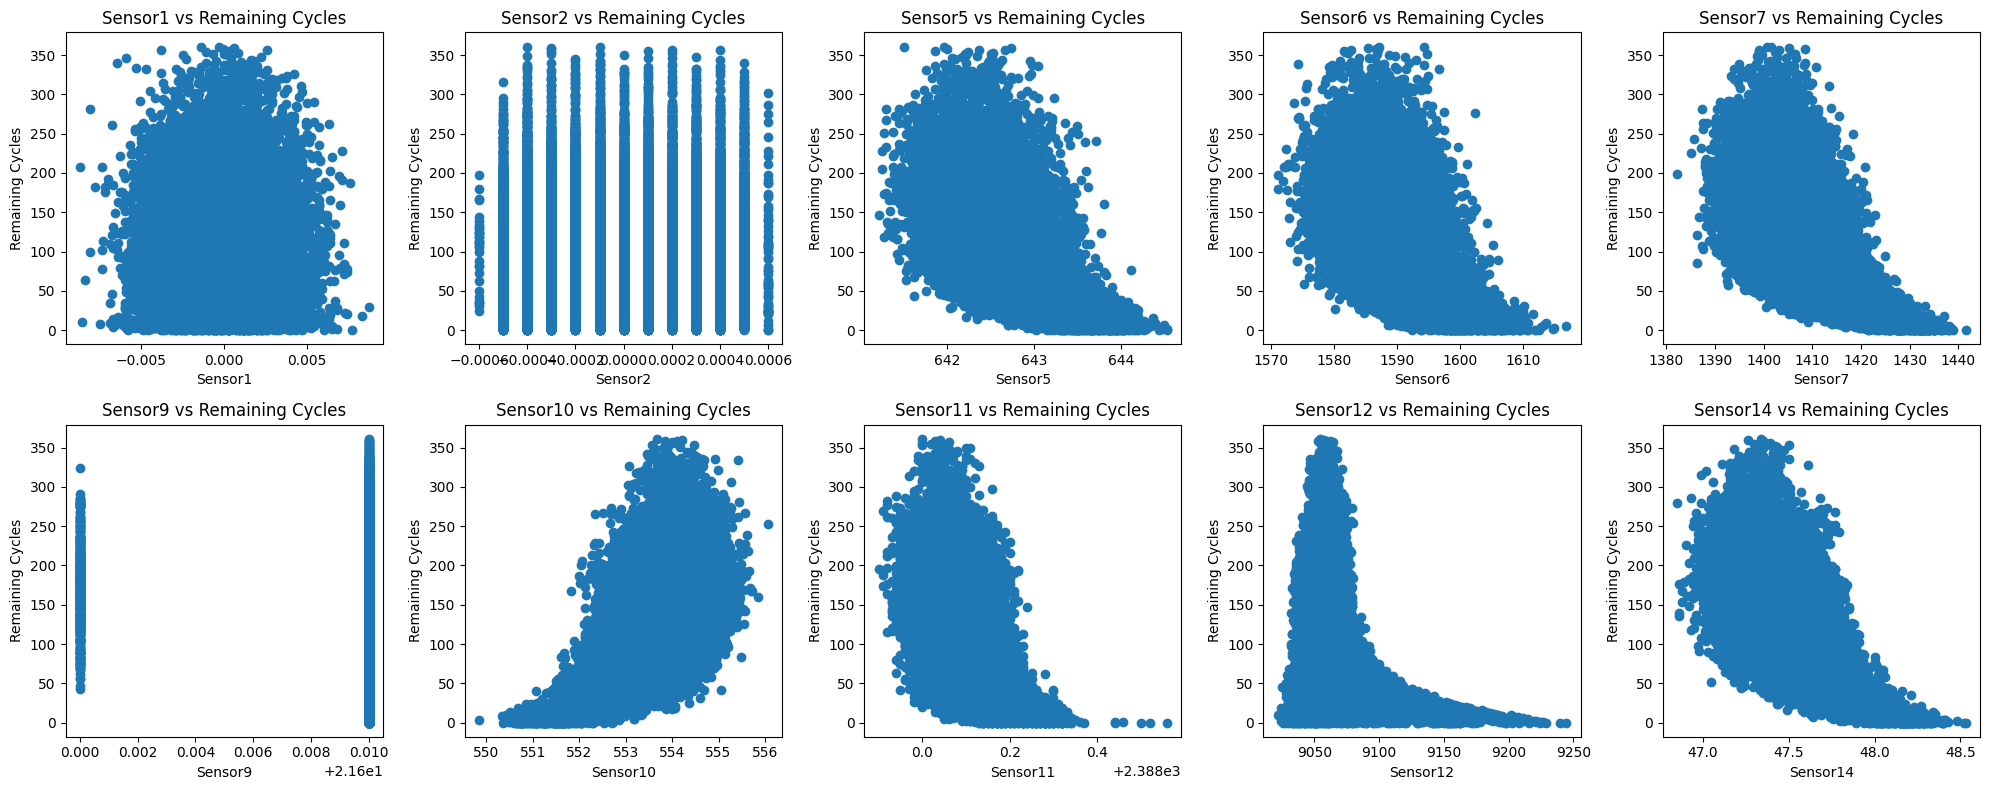

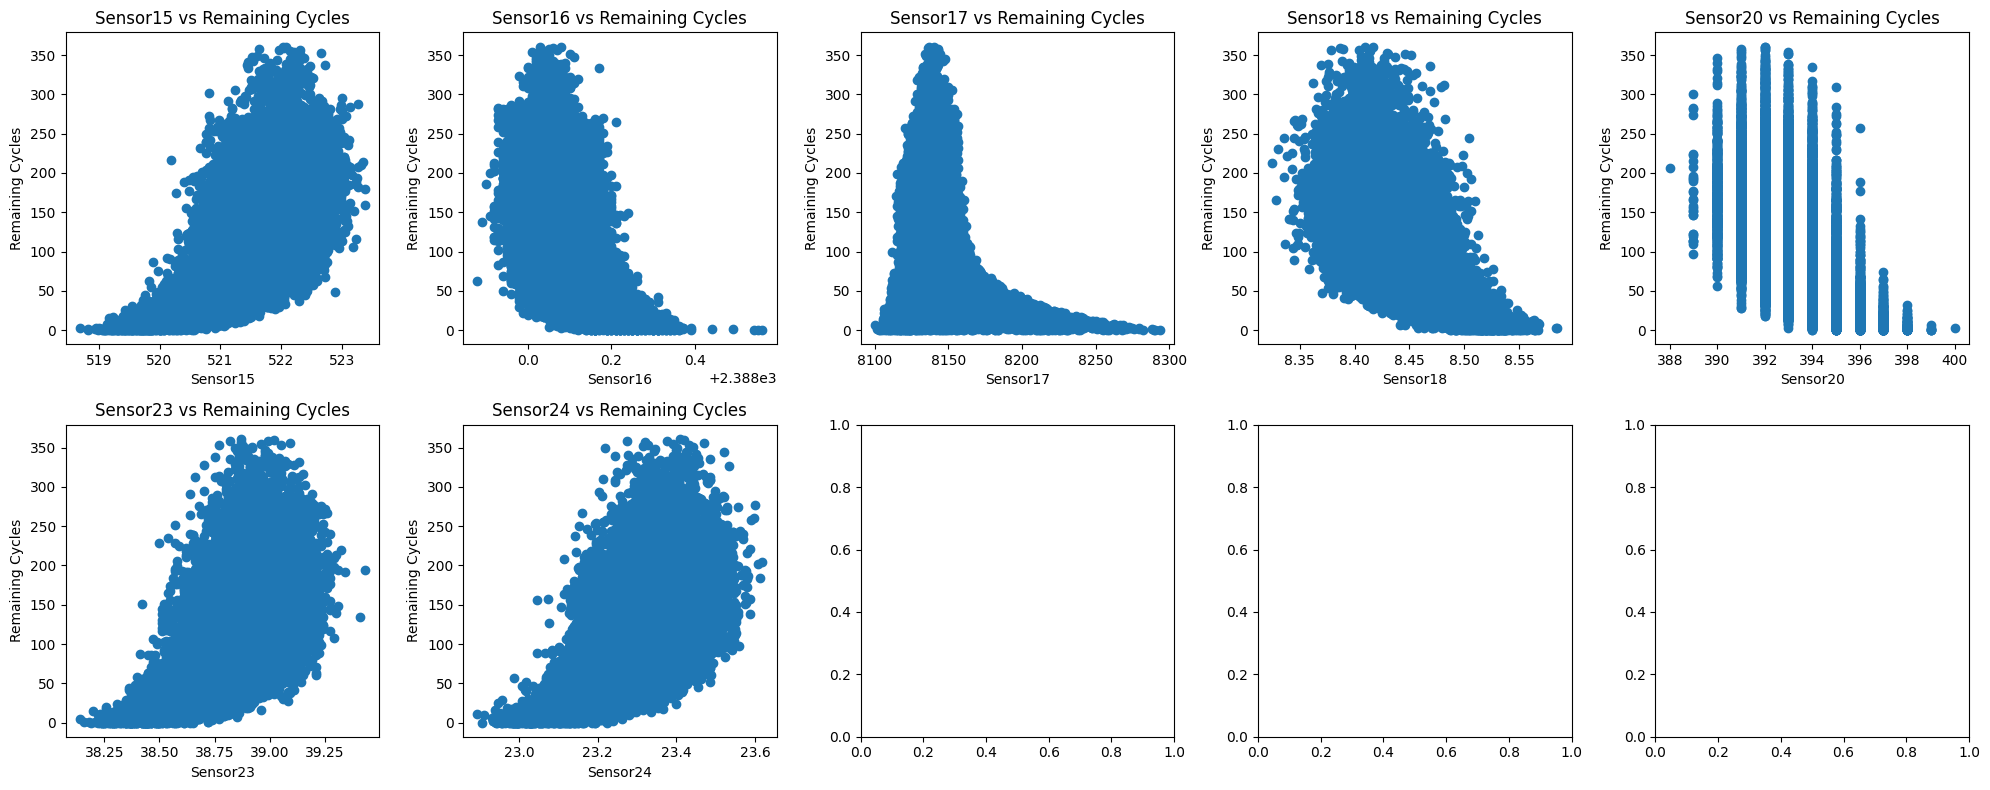

In [16]:
# Scatter plots for sensors vs remaining cycles
for j in range(0, len(sensors), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()
    for i, sensor in enumerate(sensors[j:j+10]):
        axs[i].scatter(data[sensor], data['Remaining Cycles'])
        axs[i].set_title(f'{sensor} vs Remaining Cycles')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel('Remaining Cycles')
    plt.tight_layout()
    plt.show()

Group: Remaining Cycles = 0, Size = 100
           Engine      Cycles     Sensor1    Sensor2    Sensor5      Sensor6  \
count  100.000000  100.000000  100.000000  100.00000  100.00000   100.000000   
mean    50.500000  206.310000    0.000044   -0.00005  643.72180  1602.499000   
std     29.011492   46.342749    0.002331    0.00030    0.28766     4.373002   
min      1.000000  128.000000   -0.005800   -0.00050  643.02000  1592.450000   
25%     25.750000  177.000000   -0.001625   -0.00030  643.50000  1599.237500   
50%     50.500000  199.000000    0.000200   -0.00010  643.71500  1601.870000   
75%     75.250000  229.250000    0.001400    0.00020  643.93000  1605.527500   
max    100.000000  362.000000    0.007700    0.00060  644.53000  1612.630000   

           Sensor7       Sensor9    Sensor10     Sensor11     Sensor12  \
count   100.000000  1.000000e+02  100.000000   100.000000   100.000000   
mean   1430.873200  2.161000e+01  551.361700  2388.246300  9099.359600   
std       3.92940

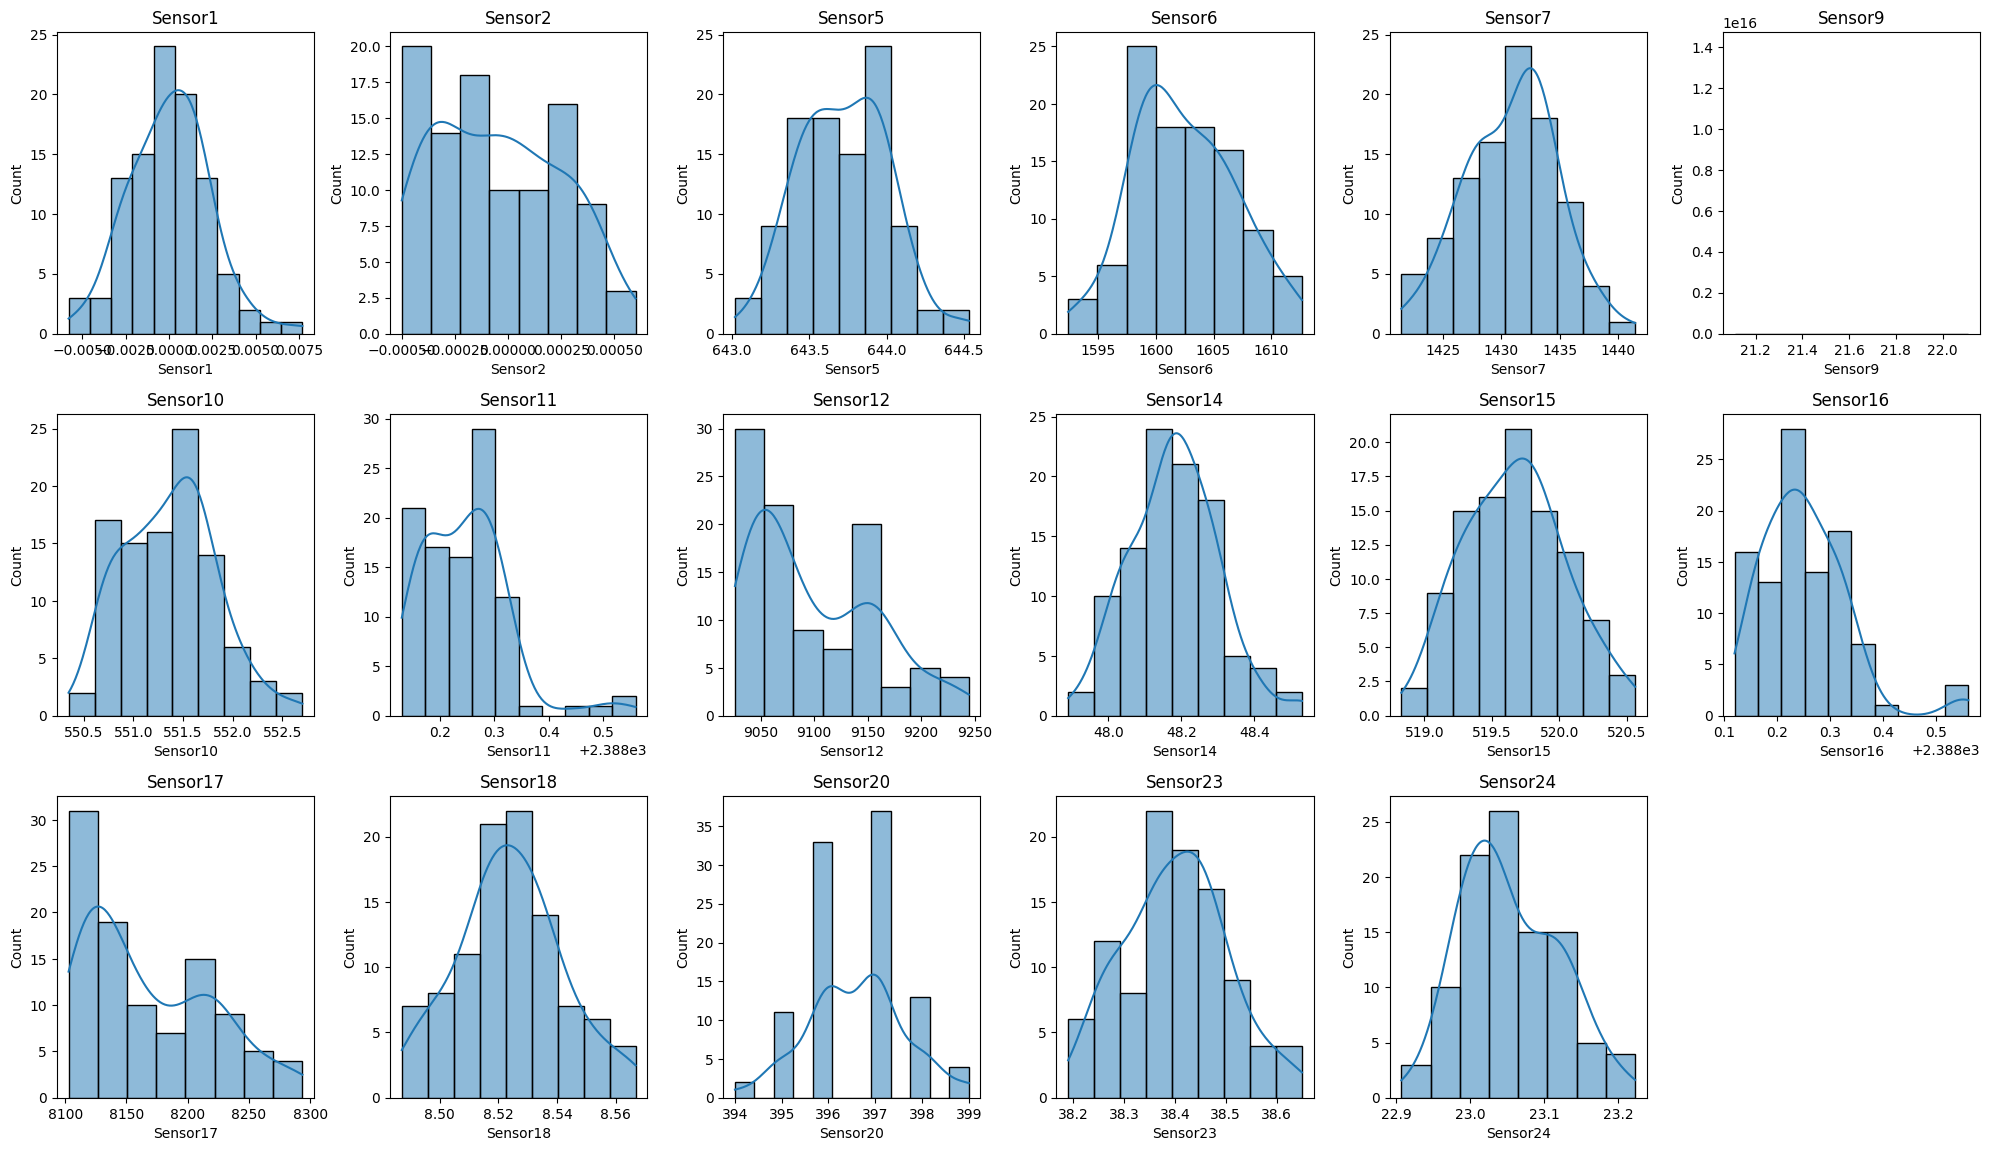

Enter 'c' to continue, 'q' to quit exploring group 0: c
Group: Remaining Cycles = 1, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  205.310000   -0.000218   -0.000005  643.714700   
std     29.011492   46.342749    0.002217    0.000286    0.296299   
min      1.000000  127.000000   -0.004400   -0.000500  643.020000   
25%     25.750000  176.000000   -0.001600   -0.000200  643.480000   
50%     50.500000  198.000000   -0.000500    0.000000  643.735000   
75%     75.250000  228.250000    0.000750    0.000200  643.915000   
max    100.000000  361.000000    0.006800    0.000600  644.530000   

           Sensor6      Sensor7       Sensor9    Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.000000   100.000000   
mean   1602.184500  1429.019800  2.161000e+01  551.427200  2388.239600   
std       4.173485     3.784247  1.071183e-14    0.440239   

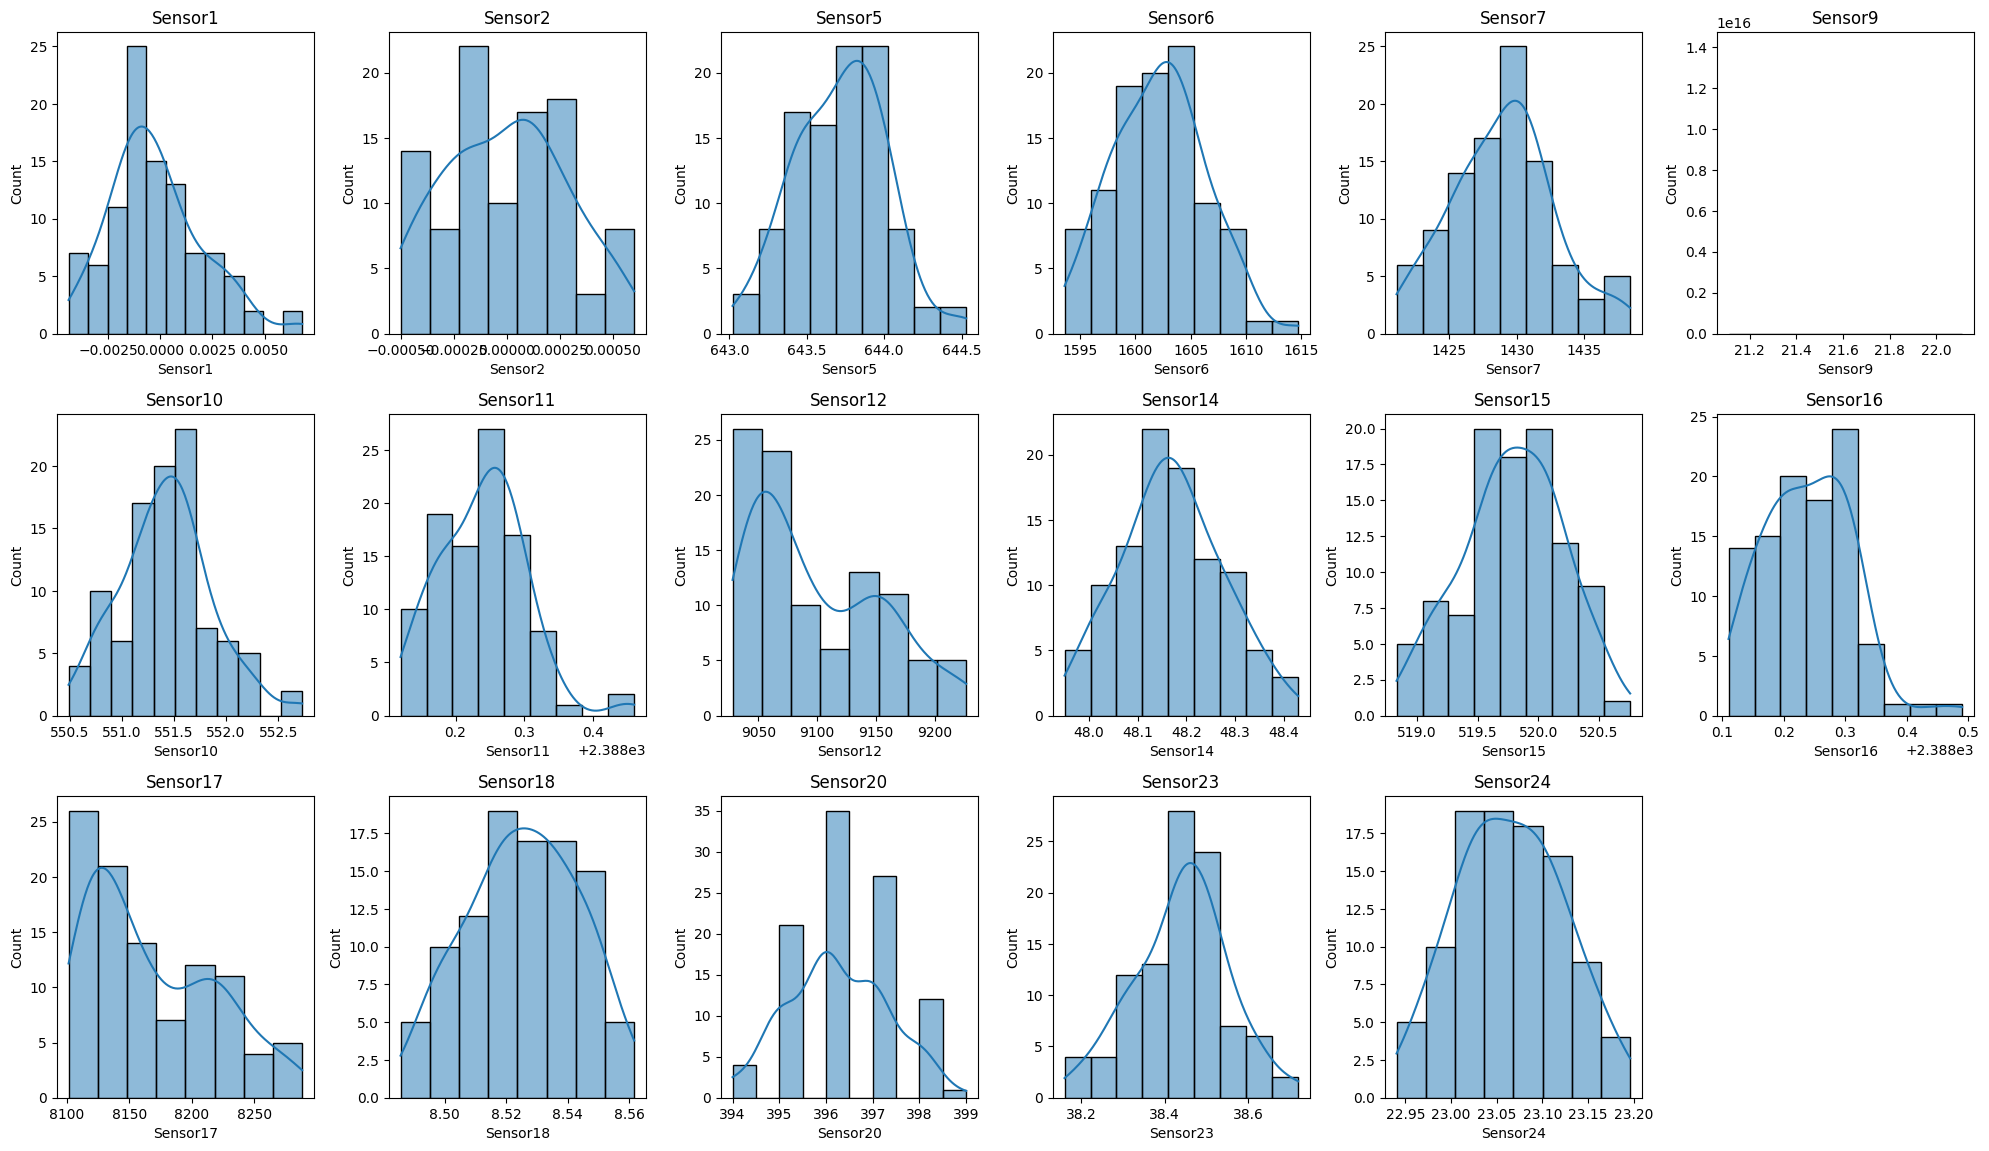

Enter 'c' to continue, 'q' to quit exploring group 1: c
Group: Remaining Cycles = 2, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  204.310000   -0.000173    0.000035  643.683700   
std     29.011492   46.342749    0.002213    0.000240    0.274773   
min      1.000000  126.000000   -0.005400   -0.000500  643.010000   
25%     25.750000  175.000000   -0.001800   -0.000100  643.480000   
50%     50.500000  197.000000    0.000100    0.000000  643.665000   
75%     75.250000  227.250000    0.001400    0.000200  643.842500   
max    100.000000  360.000000    0.005200    0.000500  644.300000   

           Sensor6      Sensor7       Sensor9    Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.000000   100.000000   
mean   1602.212900  1428.166200  2.161000e+01  551.498500  2388.233000   
std       3.771895     3.601326  1.071183e-14    0.467861   

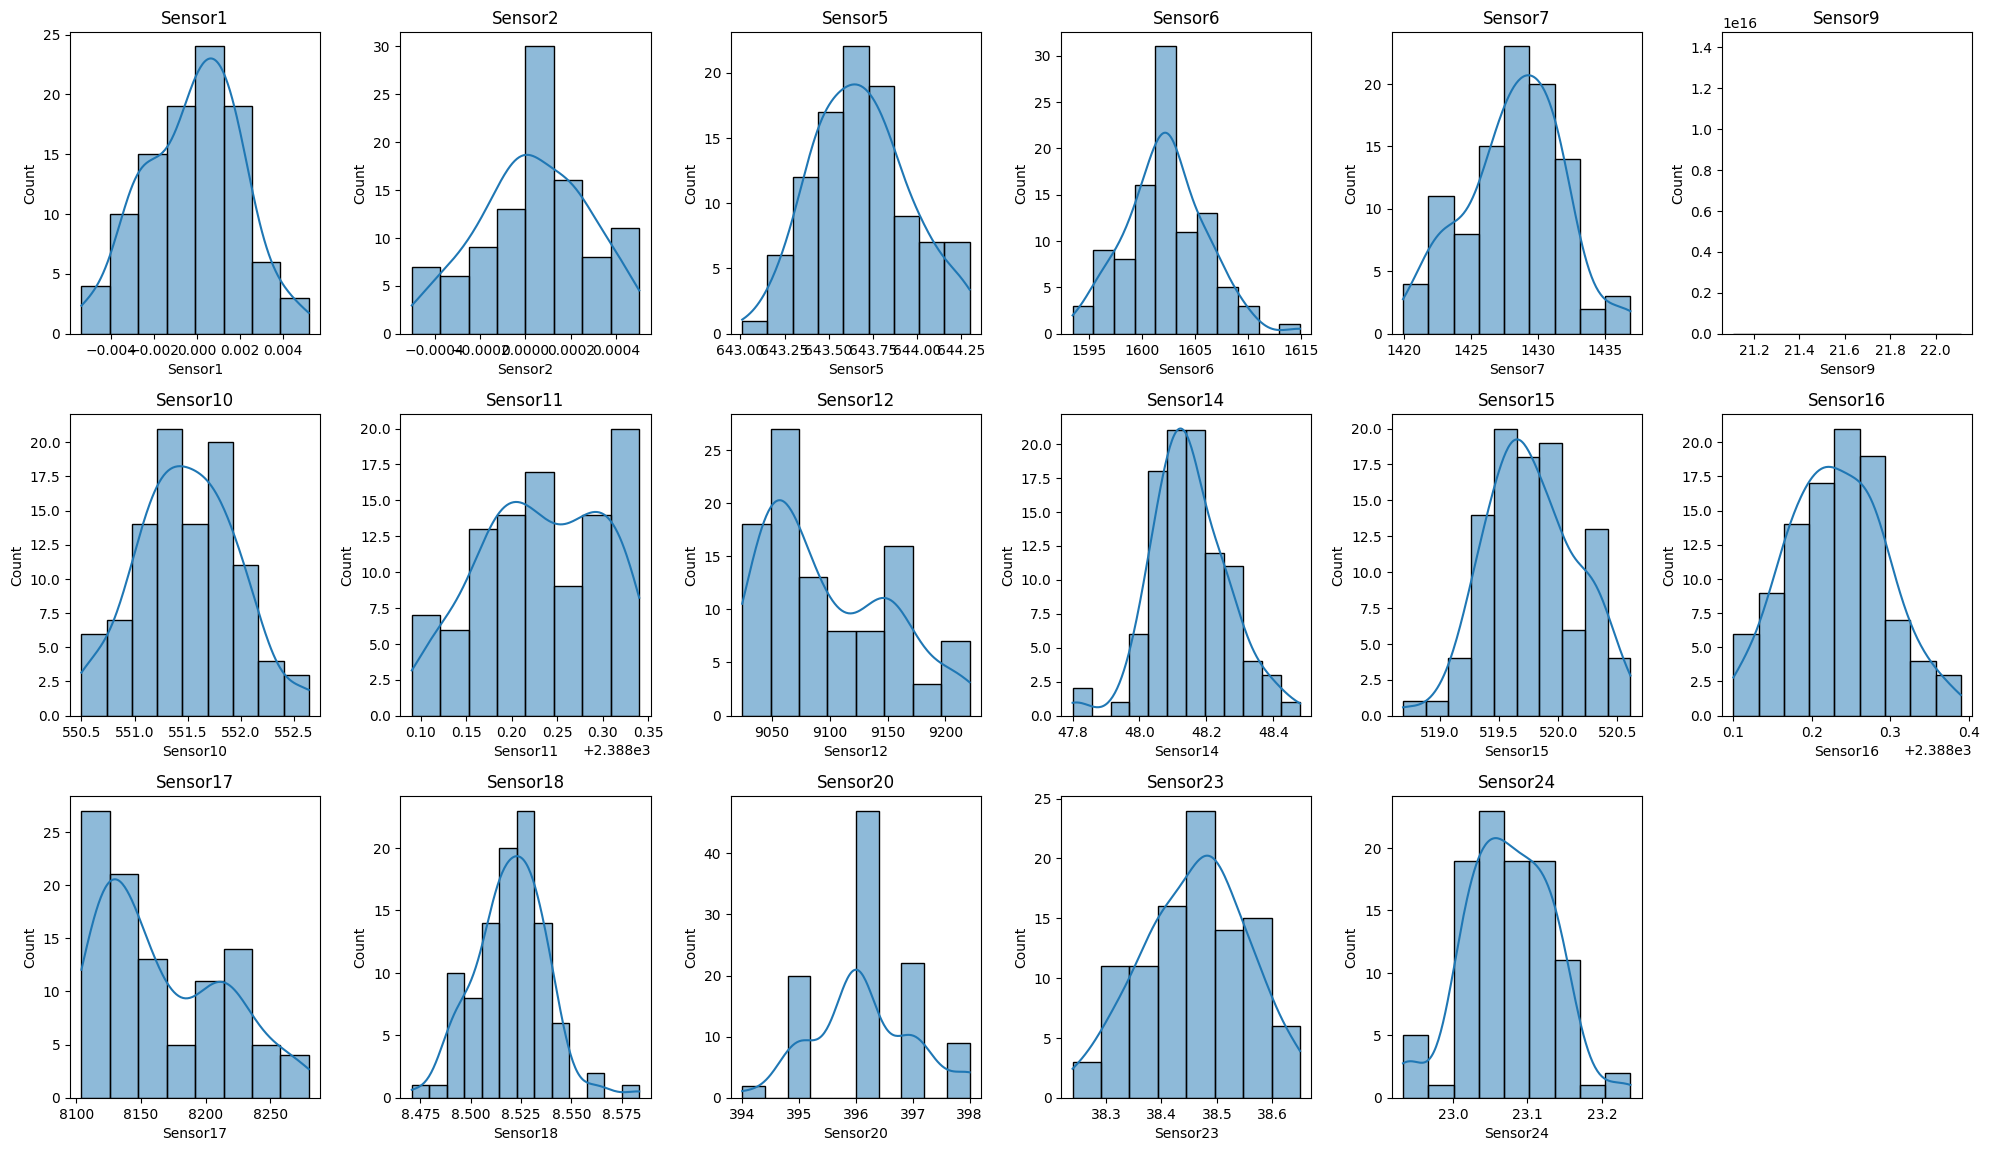

Enter 'c' to continue, 'q' to quit exploring group 2: c
Group: Remaining Cycles = 3, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  203.310000    0.000053   -0.000035  643.627500   
std     29.011492   46.342749    0.002084    0.000298    0.315045   
min      1.000000  125.000000   -0.005900   -0.000500  642.920000   
25%     25.750000  174.000000   -0.001225   -0.000300  643.380000   
50%     50.500000  196.000000    0.000150    0.000000  643.625000   
75%     75.250000  226.250000    0.001600    0.000200  643.862500   
max    100.000000  359.000000    0.006200    0.000500  644.270000   

           Sensor6      Sensor7       Sensor9    Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.000000   100.000000   
mean   1601.869400  1429.034000  2.161000e+01  551.573600  2388.226000   
std       3.687334     3.955279  1.071183e-14    0.527208   

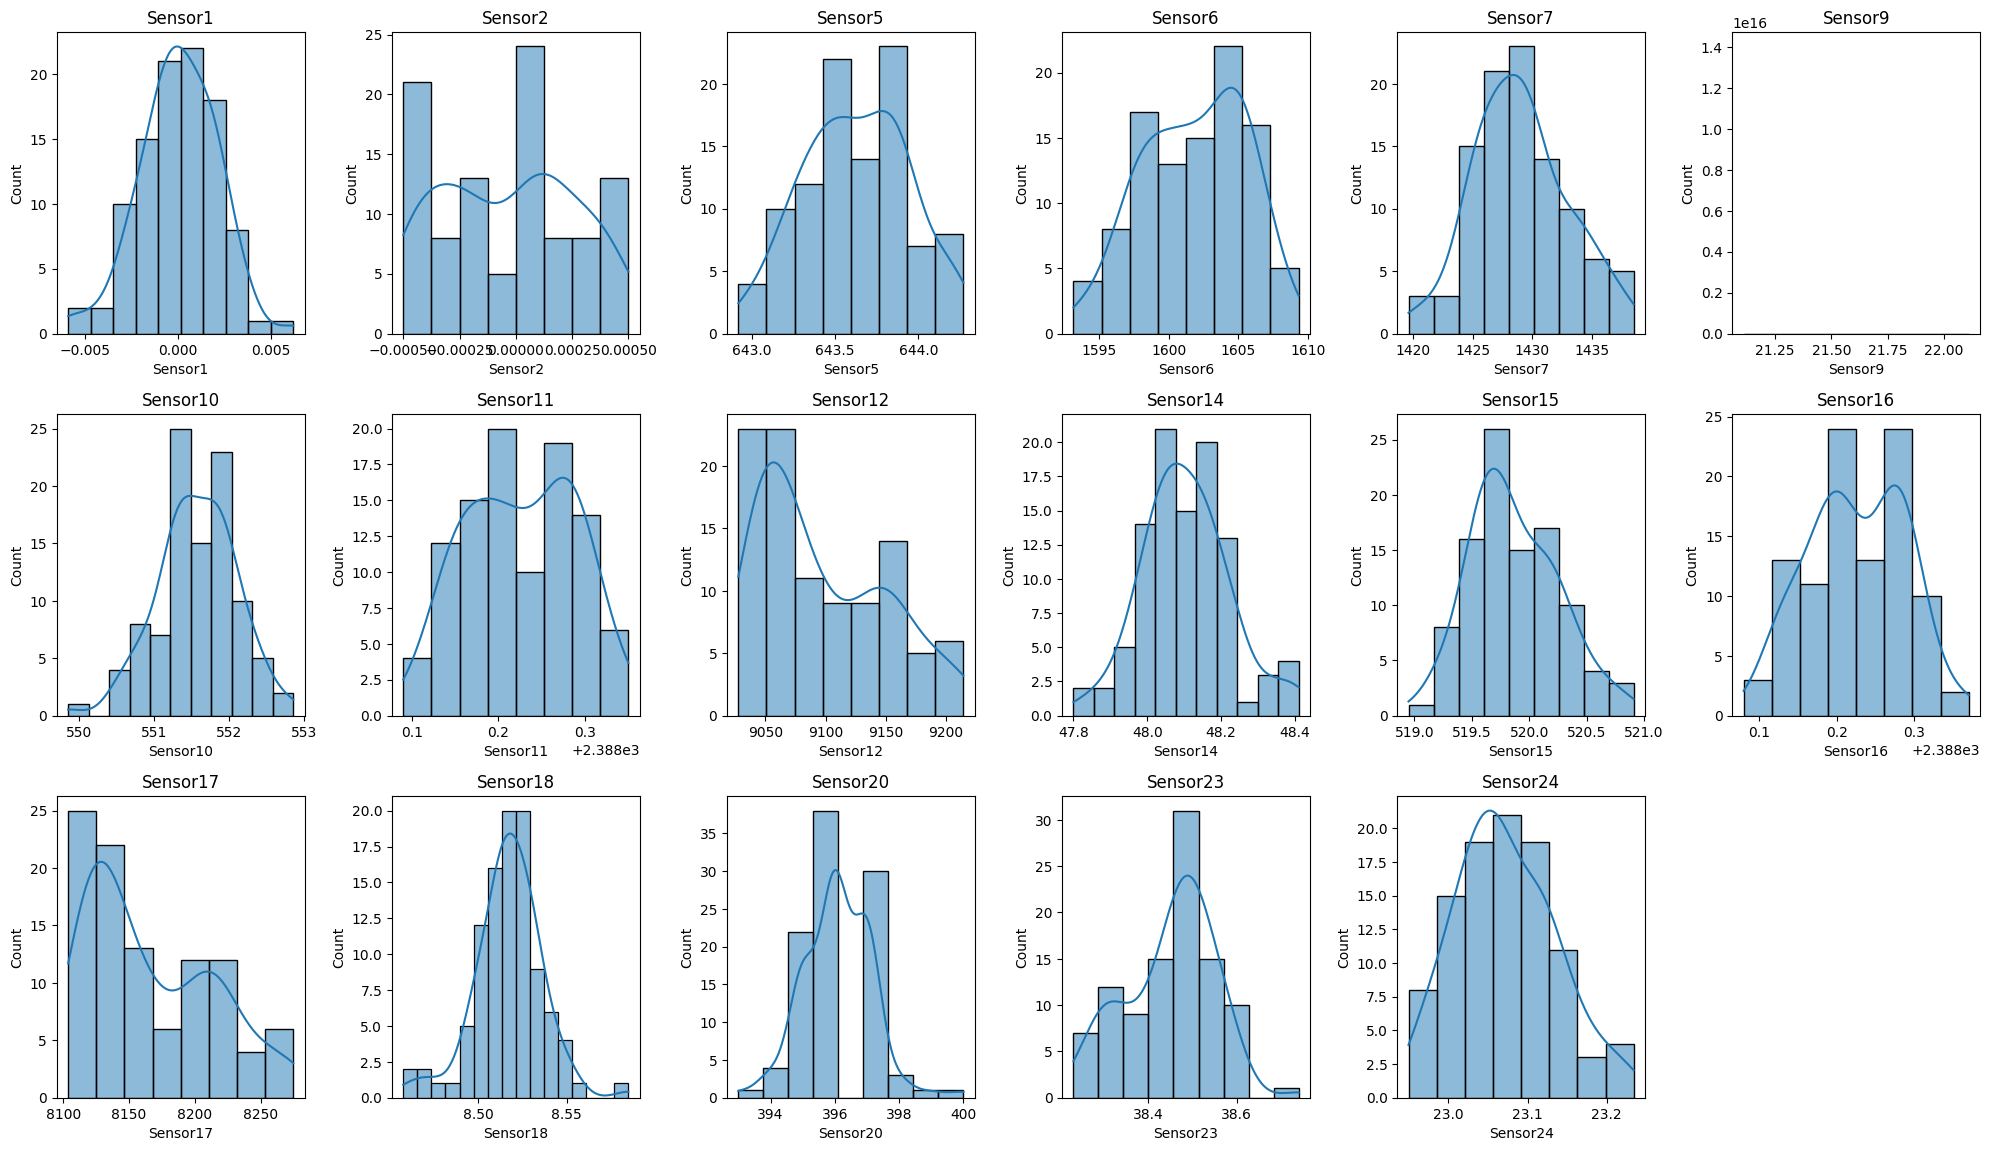

Enter 'c' to continue, 'q' to quit exploring group 3: c
Group: Remaining Cycles = 4, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  202.310000   -0.000176   -0.000008  643.602300   
std     29.011492   46.342749    0.002237    0.000279    0.266477   
min      1.000000  124.000000   -0.006700   -0.000500  642.960000   
25%     25.750000  173.000000   -0.001525   -0.000200  643.450000   
50%     50.500000  195.000000   -0.000400    0.000000  643.600000   
75%     75.250000  225.250000    0.001000    0.000200  643.782500   
max    100.000000  358.000000    0.005100    0.000500  644.310000   

           Sensor6      Sensor7       Sensor9    Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.000000   100.000000   
mean   1602.679500  1427.540600  2.161000e+01  551.613200  2388.215700   
std       3.790734     4.542097  1.071183e-14    0.433347   

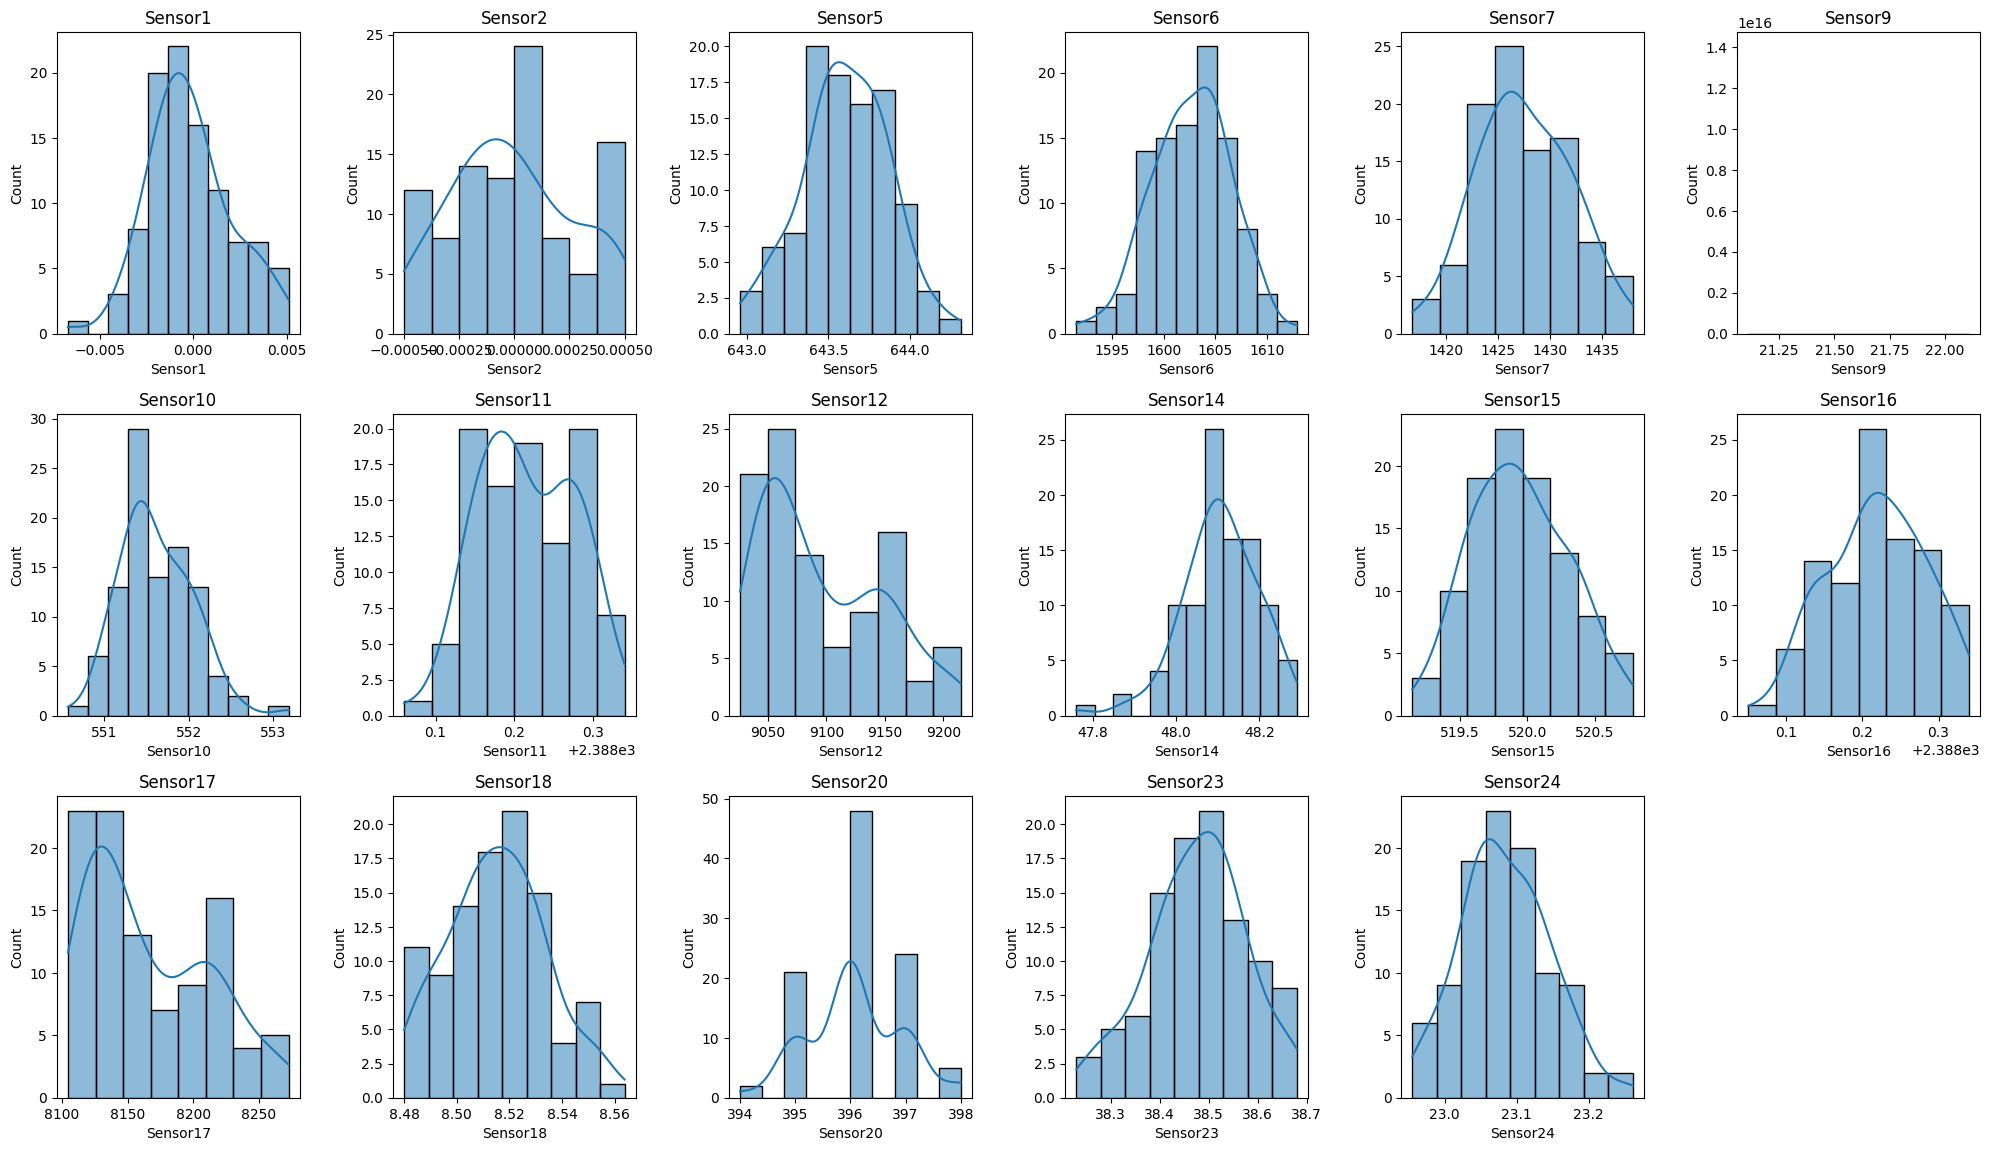

Enter 'c' to continue, 'q' to quit exploring group 4: c
Group: Remaining Cycles = 5, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5     Sensor6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   100.00000   
mean    50.500000  201.310000   -0.000090    0.000026  643.542800  1601.07400   
std     29.011492   46.342749    0.002321    0.000298    0.290239     4.53938   
min      1.000000  123.000000   -0.005000   -0.000500  642.950000  1590.69000   
25%     25.750000  172.000000   -0.001800   -0.000200  643.335000  1597.88500   
50%     50.500000  194.000000   -0.000100    0.000000  643.530000  1601.12500   
75%     75.250000  224.250000    0.001500    0.000300  643.742500  1604.22000   
max    100.000000  357.000000    0.006500    0.000500  644.350000  1616.91000   

           Sensor7       Sensor9    Sensor10     Sensor11     Sensor12  \
count   100.000000  1.000000e+02  100.000000   100.000000   100.000000   
mean   1427.520500  2.1610

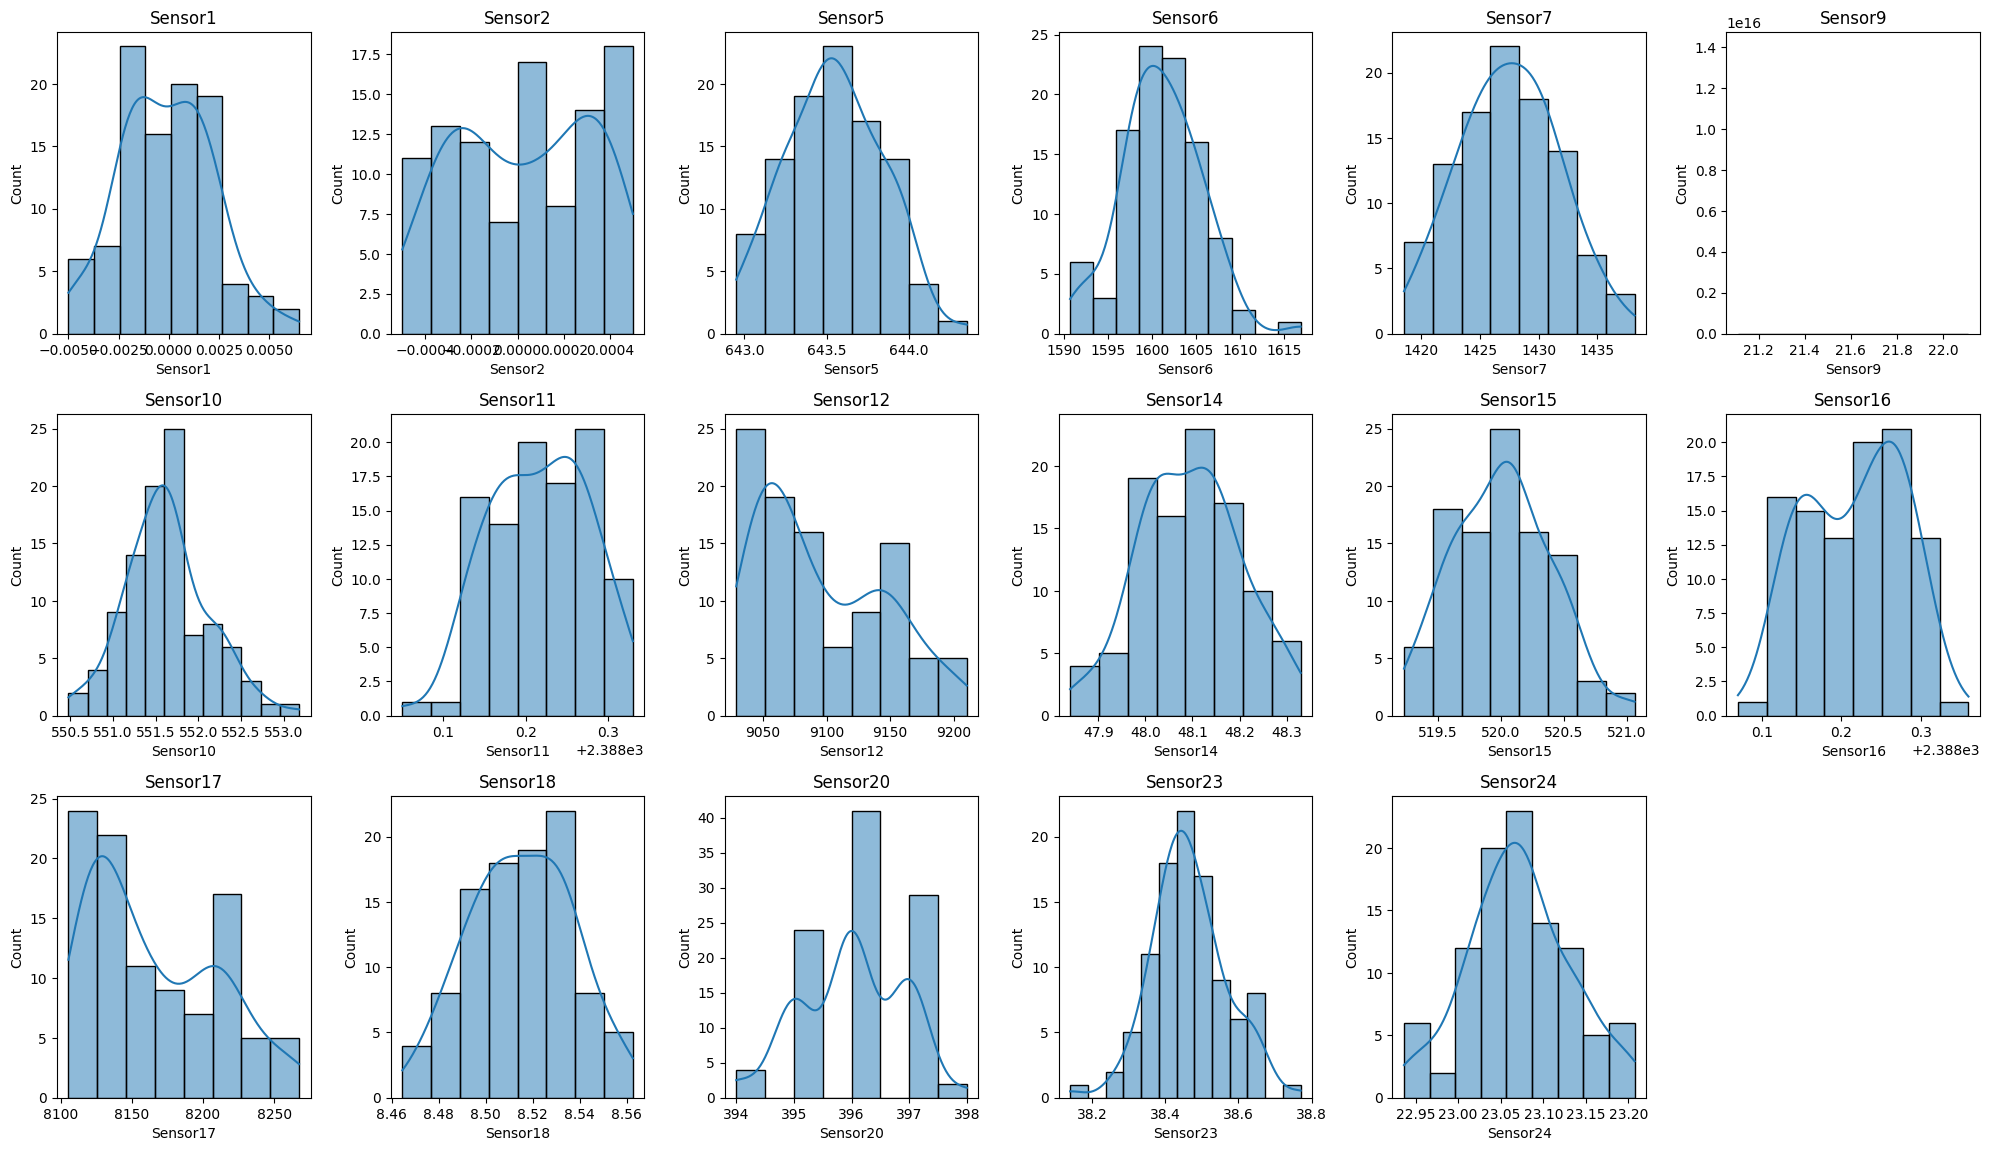

Enter 'c' to continue, 'q' to quit exploring group 5: c
Group: Remaining Cycles = 6, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  200.310000    0.000545   -0.000044  643.552200   
std     29.011492   46.342749    0.002161    0.000286    0.345387   
min      1.000000  122.000000   -0.005600   -0.000500  642.700000   
25%     25.750000  171.000000   -0.000900   -0.000300  643.330000   
50%     50.500000  193.000000    0.000650    0.000000  643.555000   
75%     75.250000  223.250000    0.002200    0.000200  643.812500   
max    100.000000  356.000000    0.006000    0.000600  644.500000   

           Sensor6      Sensor7       Sensor9   Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.00000   100.000000   
mean   1600.479800  1426.418500  2.161000e+01  551.71630  2388.208600   
std       4.482004     4.458058  1.071183e-14    0.43111     0.

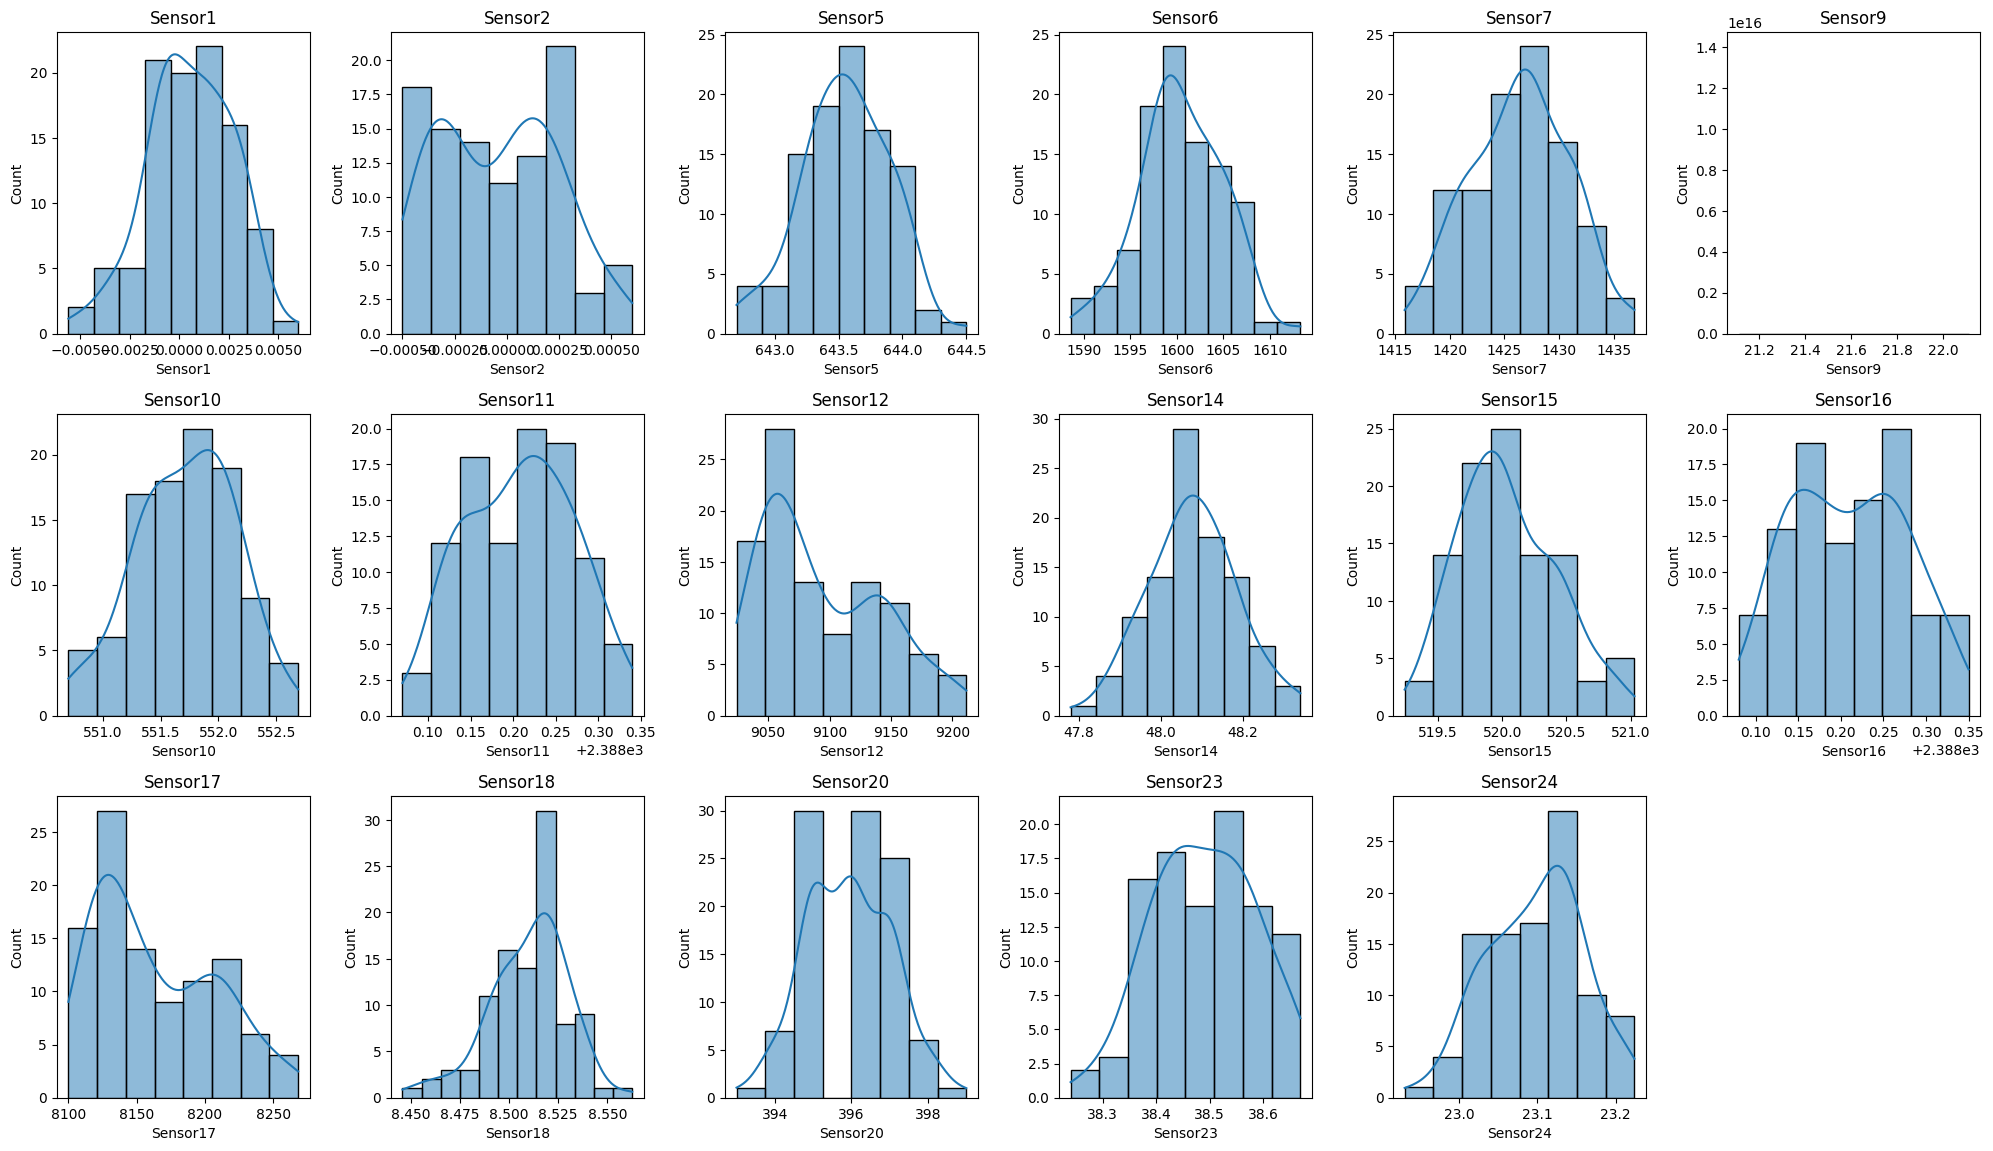

Enter 'c' to continue, 'q' to quit exploring group 6: c
Group: Remaining Cycles = 7, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  199.310000   -0.000250    0.000024  643.527300   
std     29.011492   46.342749    0.002140    0.000284    0.282496   
min      1.000000  121.000000   -0.006600   -0.000500  642.920000   
25%     25.750000  170.000000   -0.001500   -0.000200  643.357500   
50%     50.500000  192.000000   -0.000100    0.000050  643.530000   
75%     75.250000  222.250000    0.001325    0.000300  643.702500   
max    100.000000  355.000000    0.005000    0.000500  644.300000   

           Sensor6      Sensor7       Sensor9    Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.000000   100.000000   
mean   1600.299800  1425.376200  2.161000e+01  551.780700  2388.210300   
std       4.087485     4.456925  1.071183e-14    0.474276   

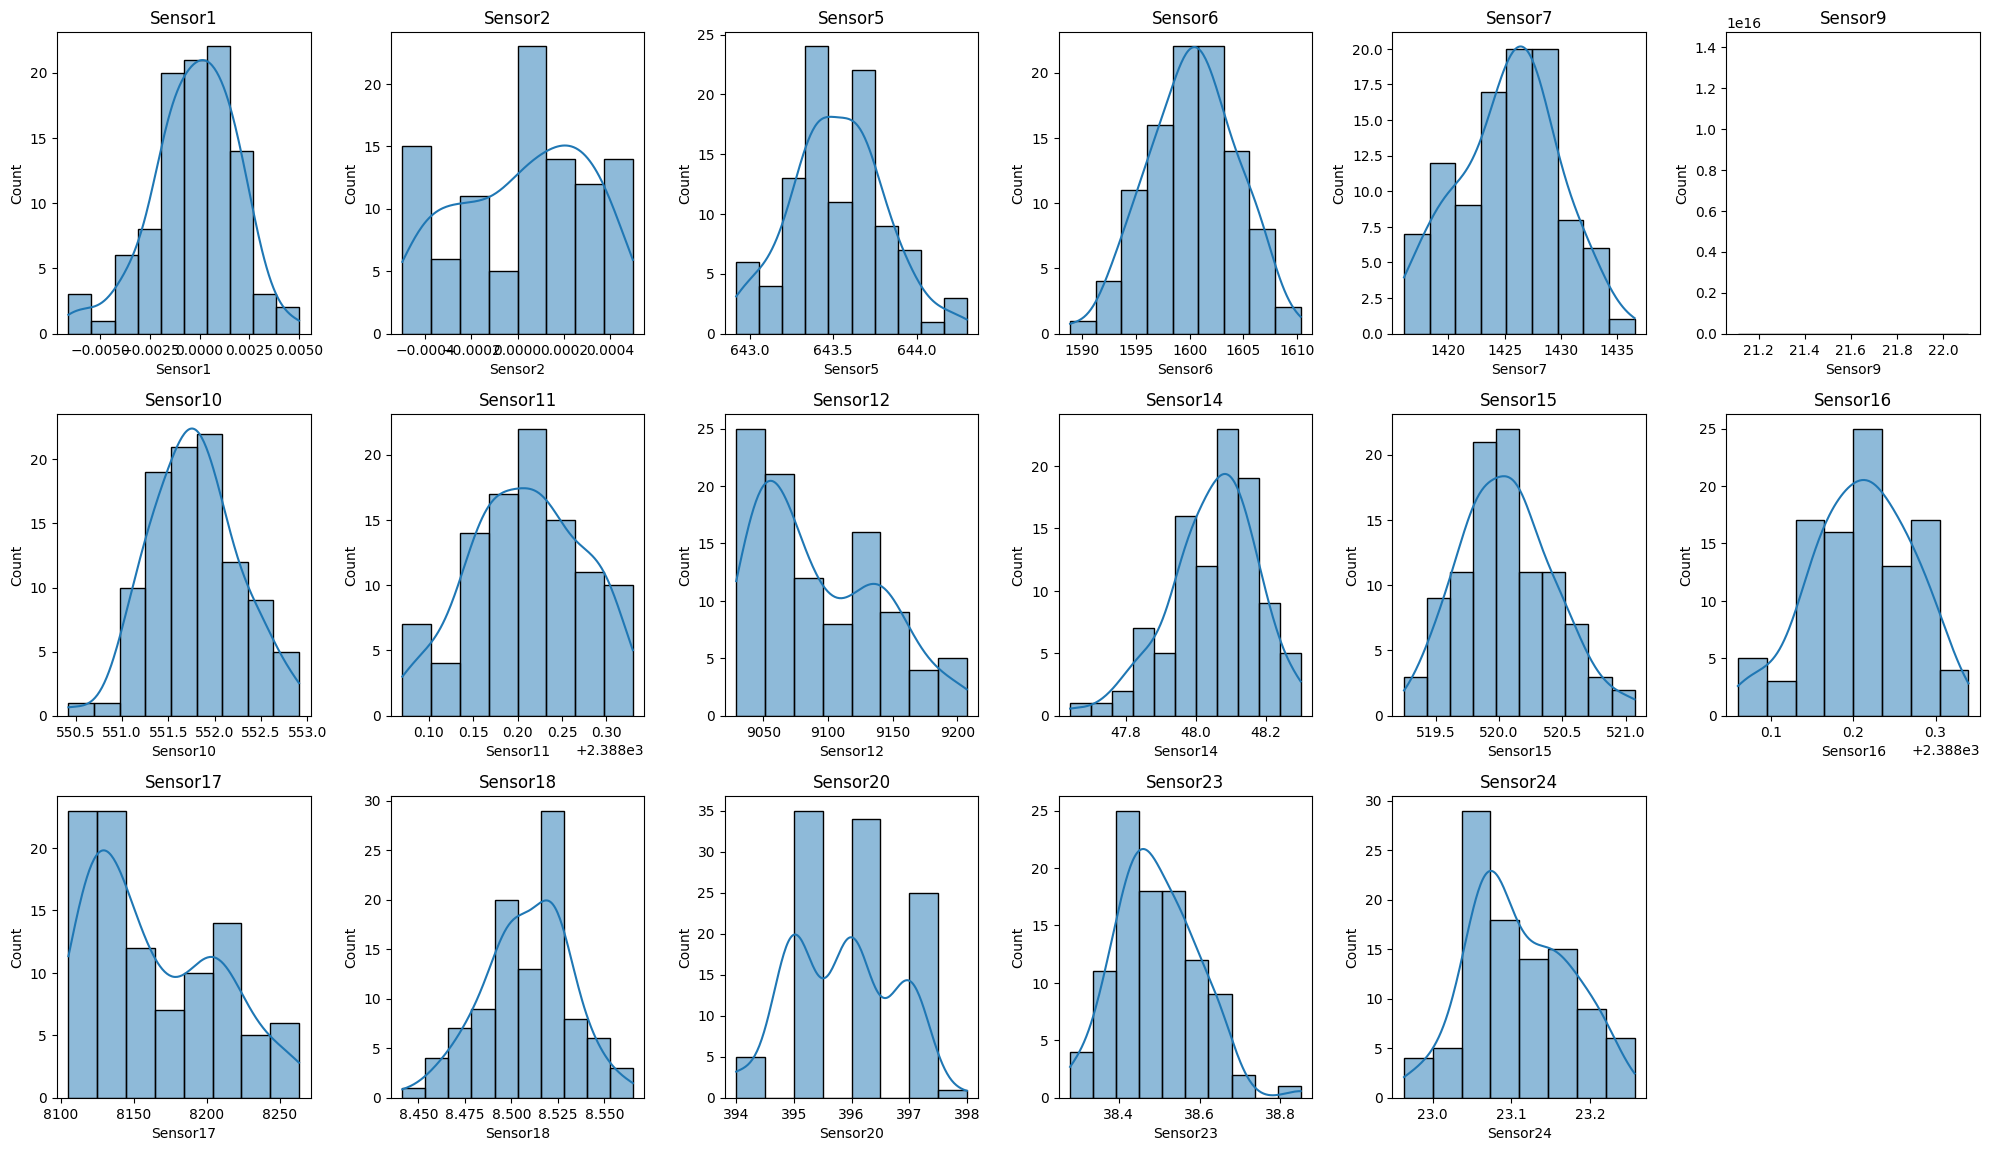

Enter 'c' to continue, 'q' to quit exploring group 7: c
Group: Remaining Cycles = 8, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  198.310000    0.000071    0.000008  643.480900   
std     29.011492   46.342749    0.002331    0.000298    0.268193   
min      1.000000  120.000000   -0.007500   -0.000500  642.980000   
25%     25.750000  169.000000   -0.001100   -0.000225  643.300000   
50%     50.500000  191.000000    0.000150    0.000000  643.490000   
75%     75.250000  221.250000    0.001525    0.000300  643.680000   
max    100.000000  354.000000    0.005900    0.000500  644.140000   

           Sensor6      Sensor7       Sensor9    Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.000000   100.000000   
mean   1600.667100  1425.293100  2.161000e+01  551.783100  2388.199500   
std       3.638454     4.198566  1.071183e-14    0.474228   

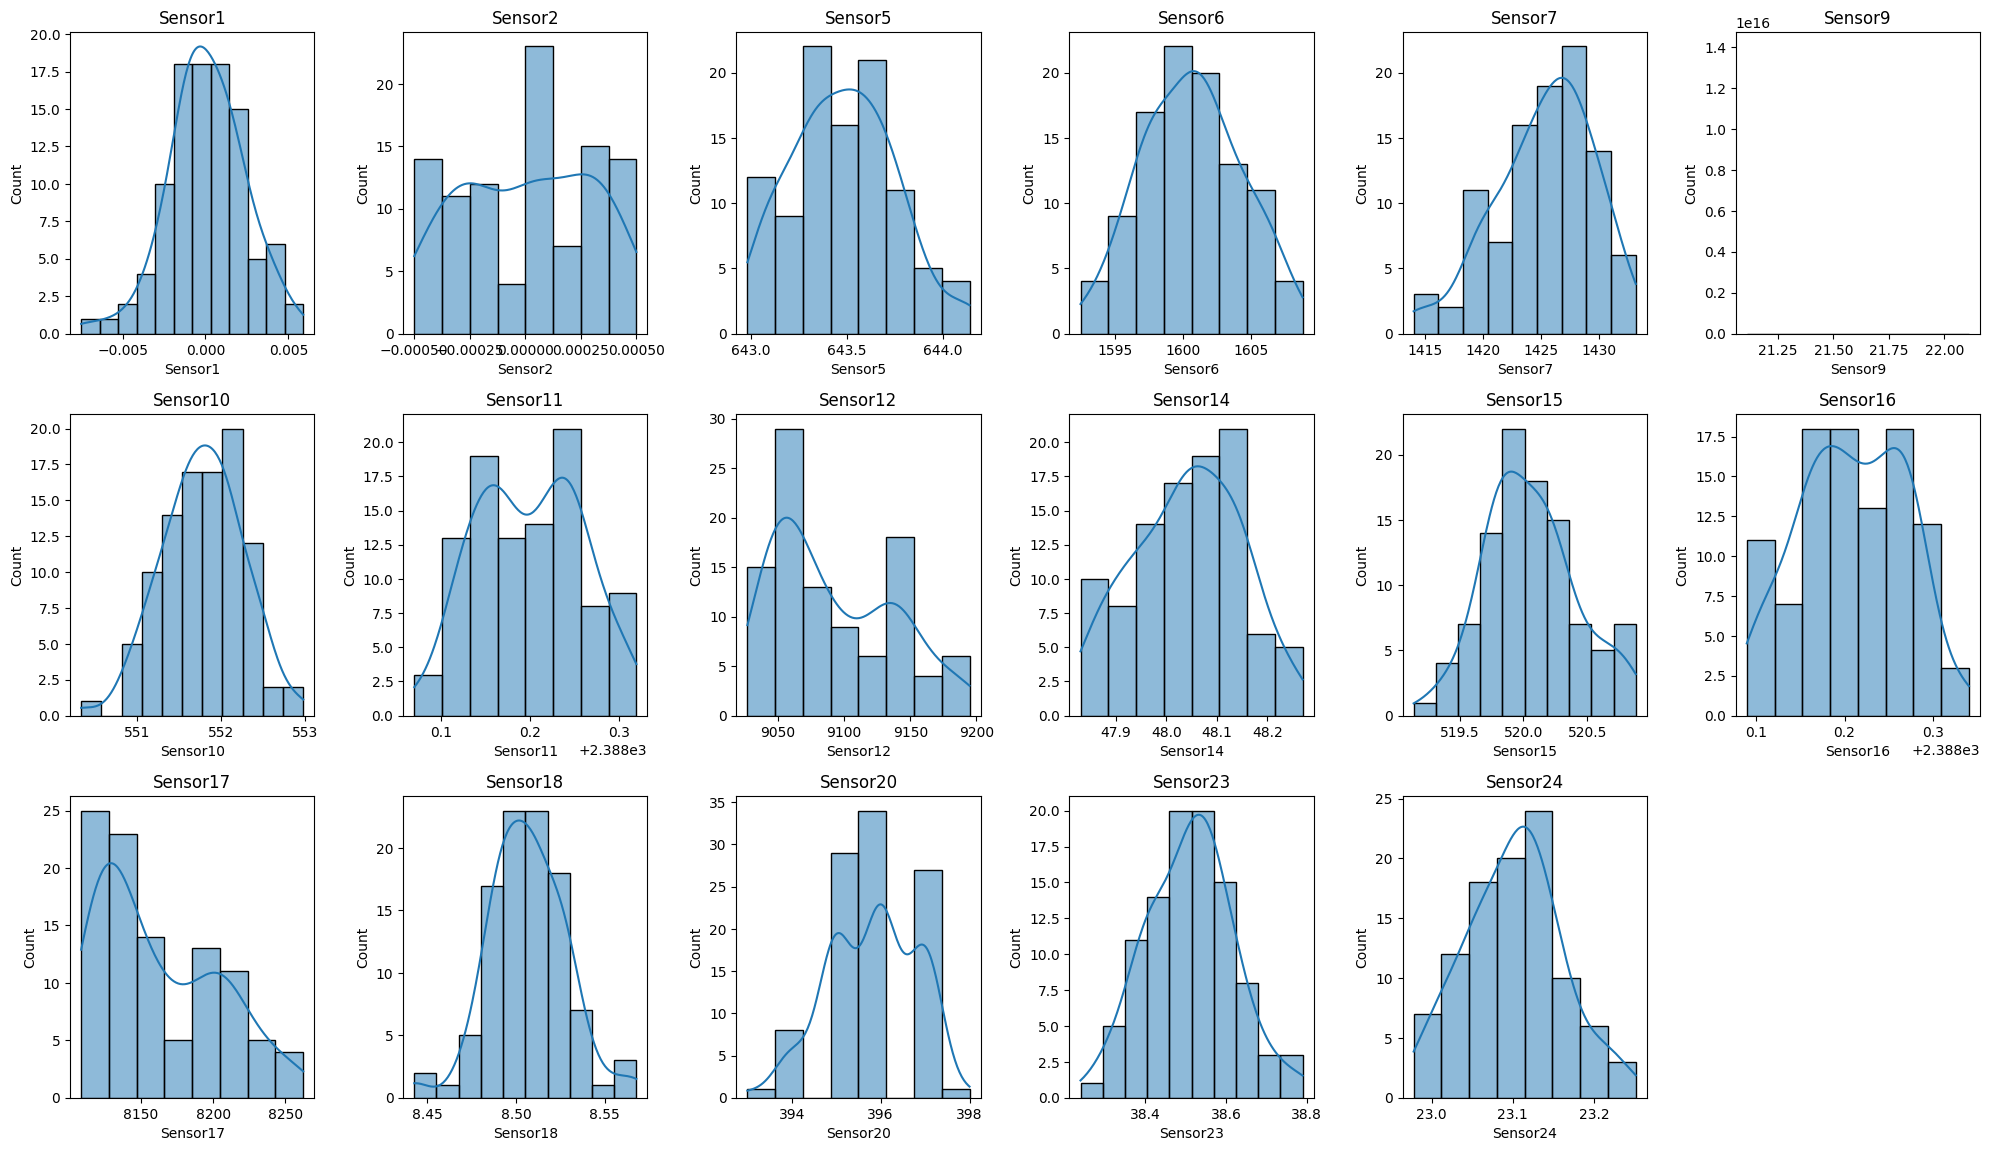

Enter 'c' to continue, 'q' to quit exploring group 8: c
Group: Remaining Cycles = 9, Size = 100
           Engine      Cycles     Sensor1     Sensor2    Sensor5      Sensor6  \
count  100.000000  100.000000  100.000000  100.000000  100.00000   100.000000   
mean    50.500000  197.310000   -0.000081    0.000002  643.51860  1600.410000   
std     29.011492   46.342749    0.002198    0.000291    0.29936     4.199458   
min      1.000000  119.000000   -0.006900   -0.000500  642.99000  1592.250000   
25%     25.750000  168.000000   -0.001425   -0.000300  643.27750  1597.502500   
50%     50.500000  190.000000   -0.000150    0.000000  643.46500  1599.965000   
75%     75.250000  220.250000    0.001400    0.000225  643.69250  1603.140000   
max    100.000000  353.000000    0.005600    0.000500  644.39000  1613.620000   

           Sensor7       Sensor9    Sensor10     Sensor11     Sensor12  \
count   100.000000  1.000000e+02  100.000000   100.000000   100.000000   
mean   1424.699600  2.1610

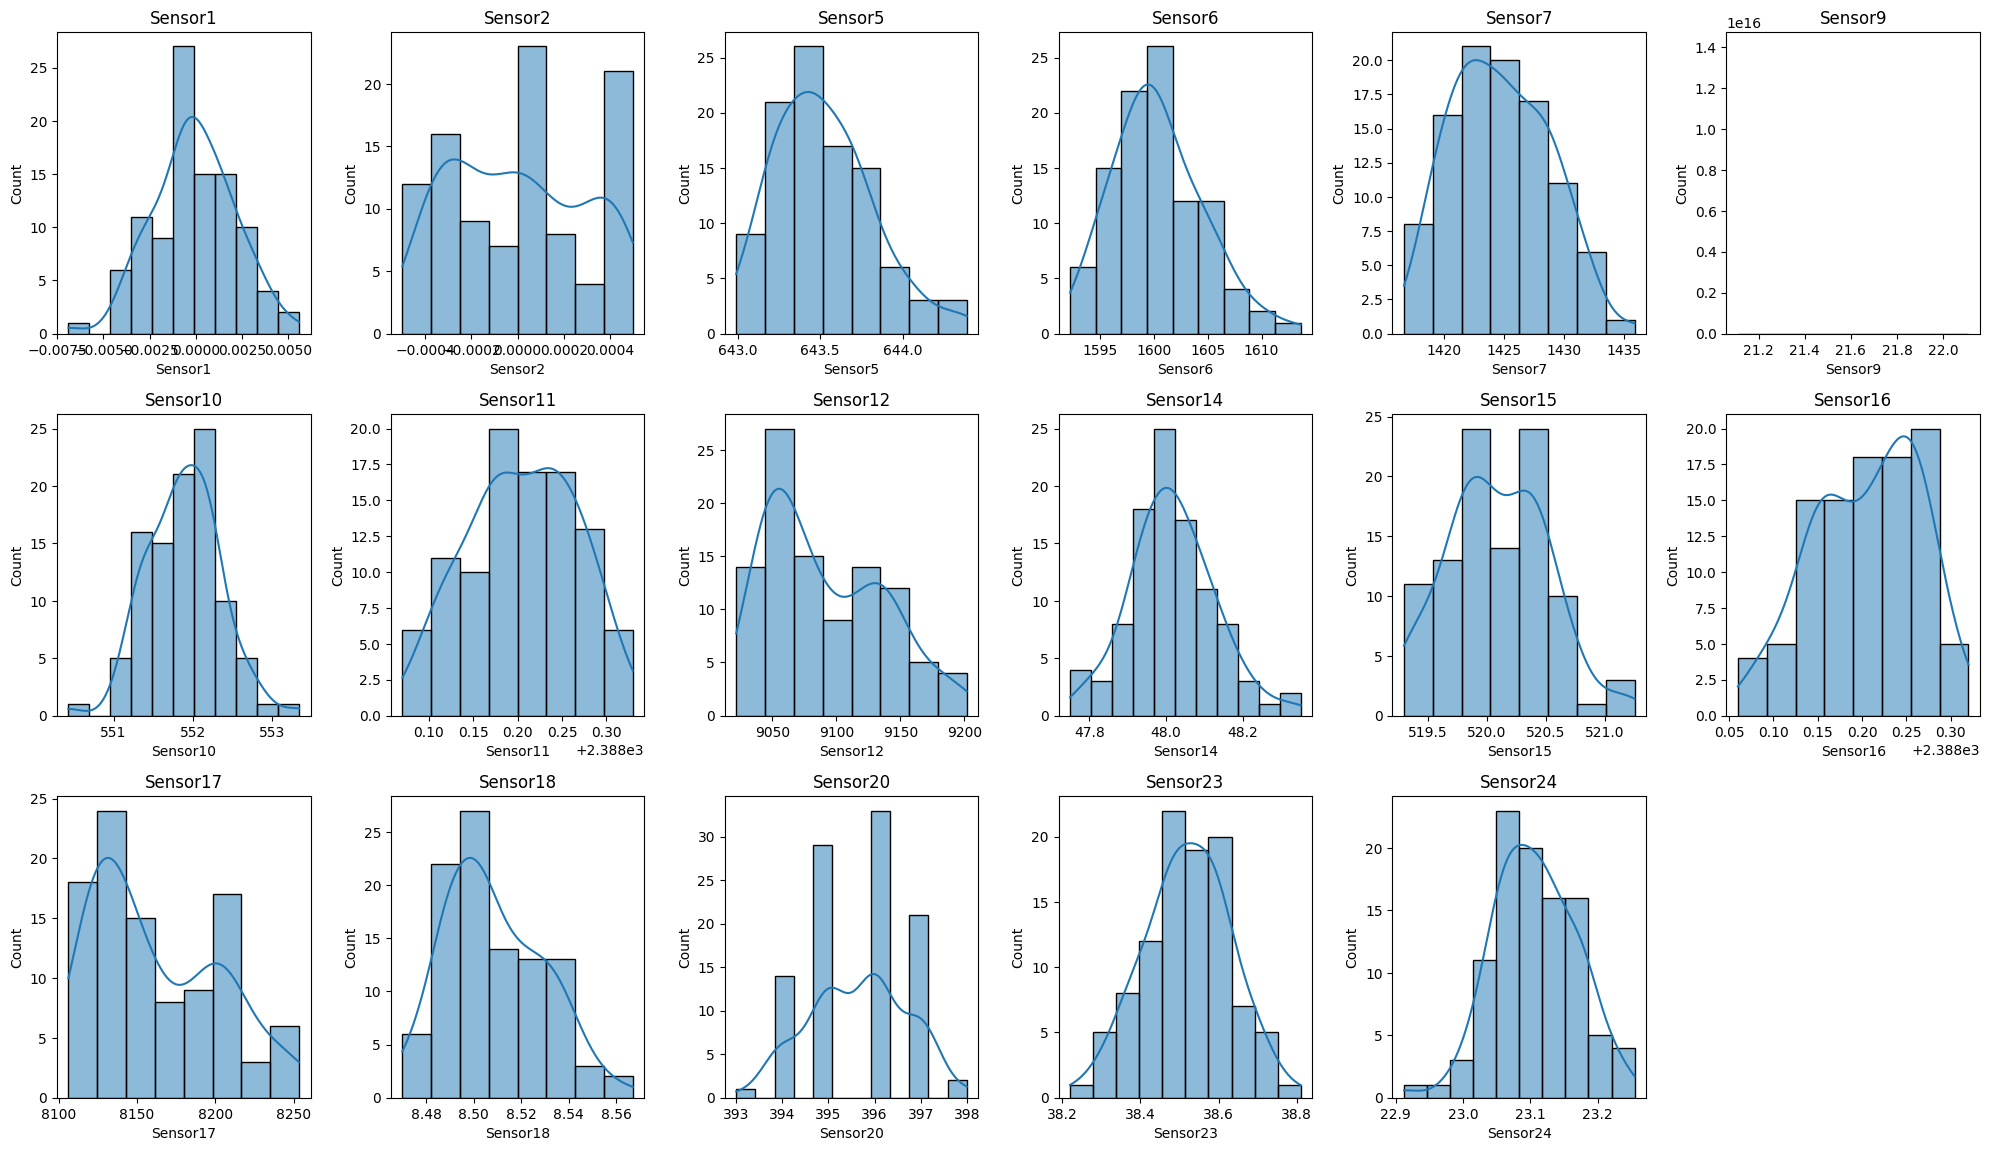

Enter 'c' to continue, 'q' to quit exploring group 9: c
Group: Remaining Cycles = 10, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  196.310000    0.000179    0.000025  643.461500   
std     29.011492   46.342749    0.002181    0.000290    0.299195   
min      1.000000  118.000000   -0.008600   -0.000500  642.860000   
25%     25.750000  167.000000   -0.001225   -0.000200  643.267500   
50%     50.500000  189.000000    0.000200    0.000000  643.455000   
75%     75.250000  219.250000    0.001625    0.000300  643.647500   
max    100.000000  352.000000    0.005700    0.000500  644.210000   

           Sensor6      Sensor7       Sensor9    Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.000000   100.000000   
mean   1599.736000  1424.191300  2.161000e+01  551.862800  2388.204200   
std       4.396588     4.109317  1.071183e-14    0.456338  

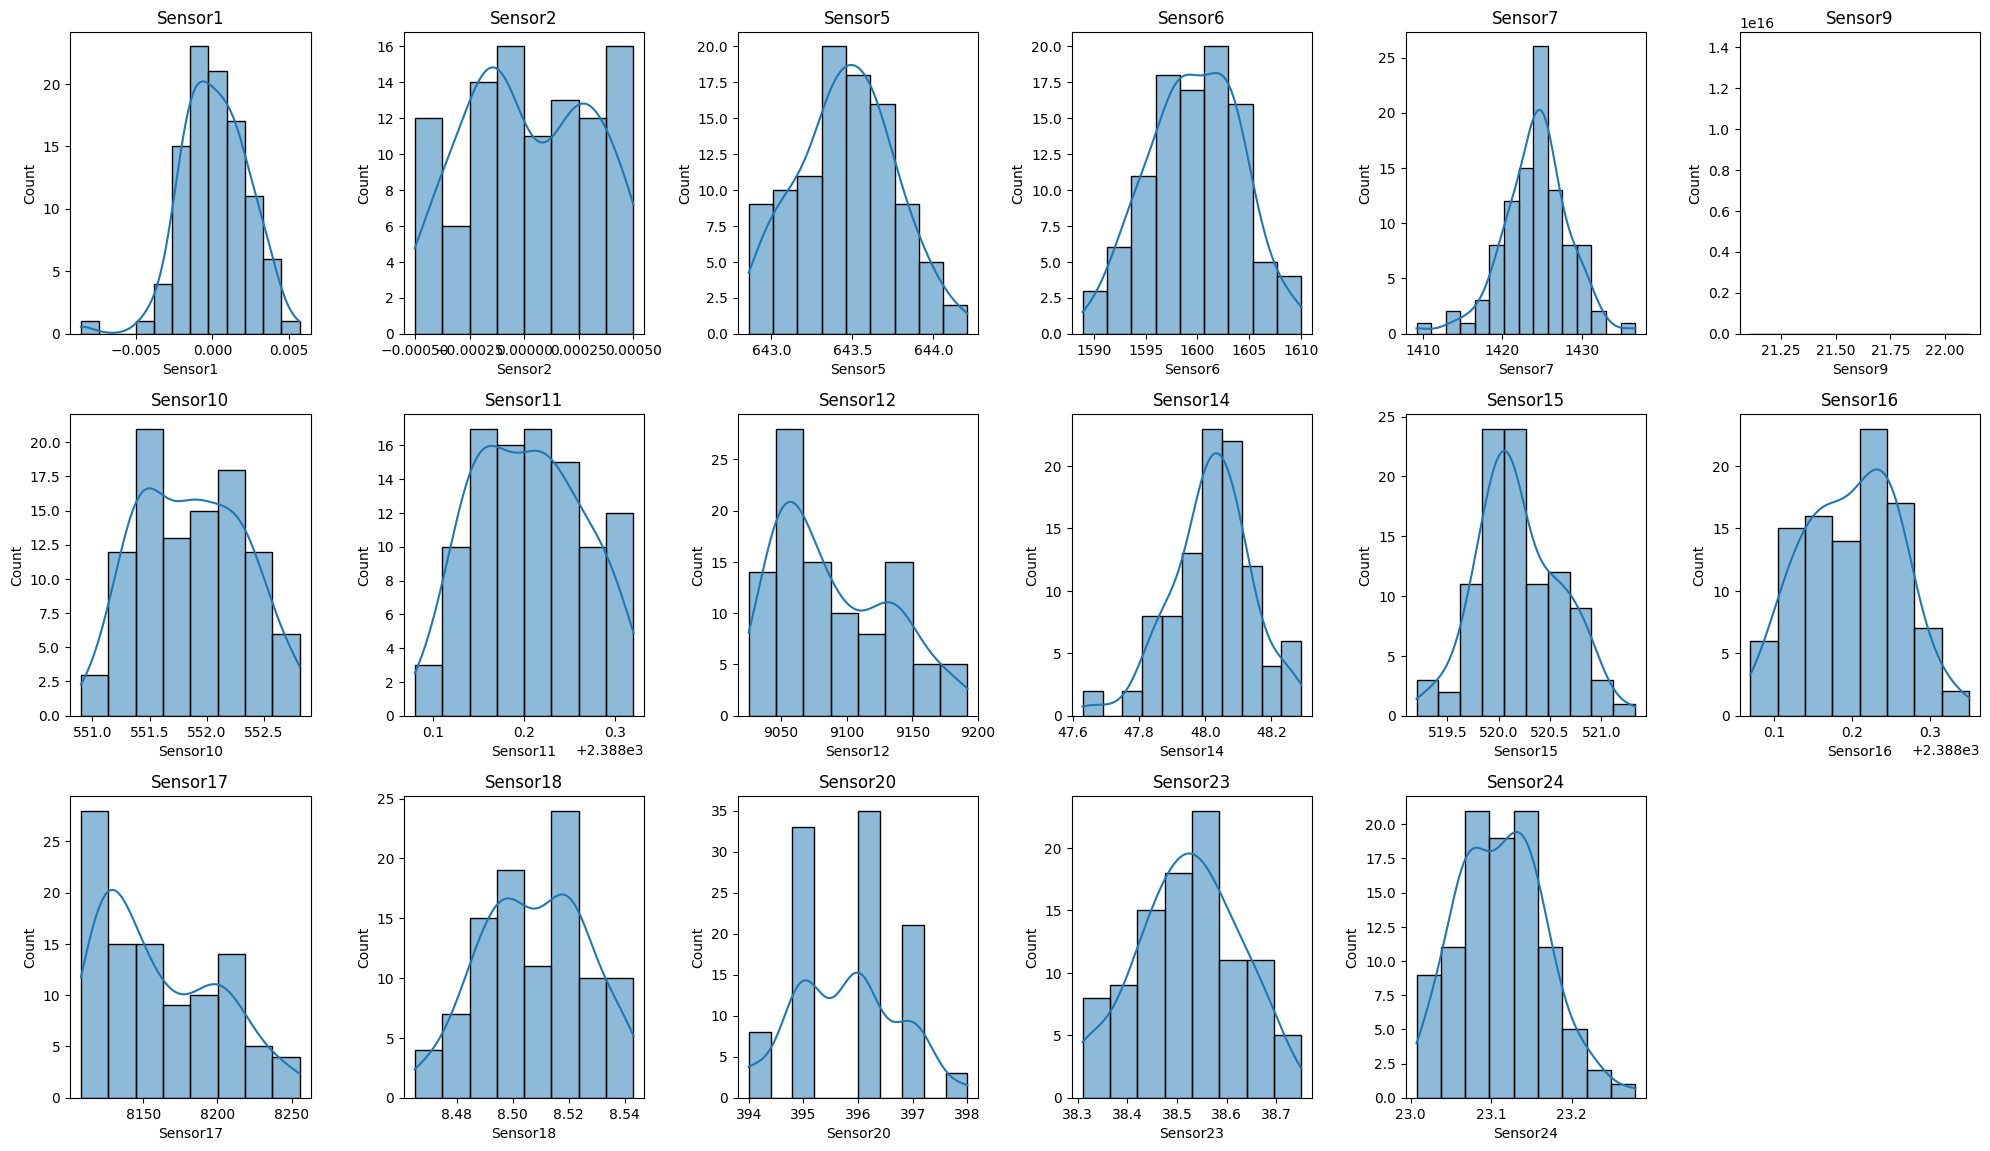

Enter 'c' to continue, 'q' to quit exploring group 10: c
Group: Remaining Cycles = 11, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  195.310000   -0.000029   -0.000006  643.455400   
std     29.011492   46.342749    0.002192    0.000278    0.282576   
min      1.000000  117.000000   -0.004300   -0.000500  642.750000   
25%     25.750000  166.000000   -0.001625   -0.000300  643.237500   
50%     50.500000  188.000000   -0.000100    0.000000  643.475000   
75%     75.250000  218.250000    0.001400    0.000200  643.612500   
max    100.000000  351.000000    0.005900    0.000500  644.260000   

           Sensor6      Sensor7       Sensor9   Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.00000   100.000000   
mean   1599.215900  1423.686800  2.161000e+01  551.93990  2388.194100   
std       4.396232     4.492112  1.071183e-14    0.47175     

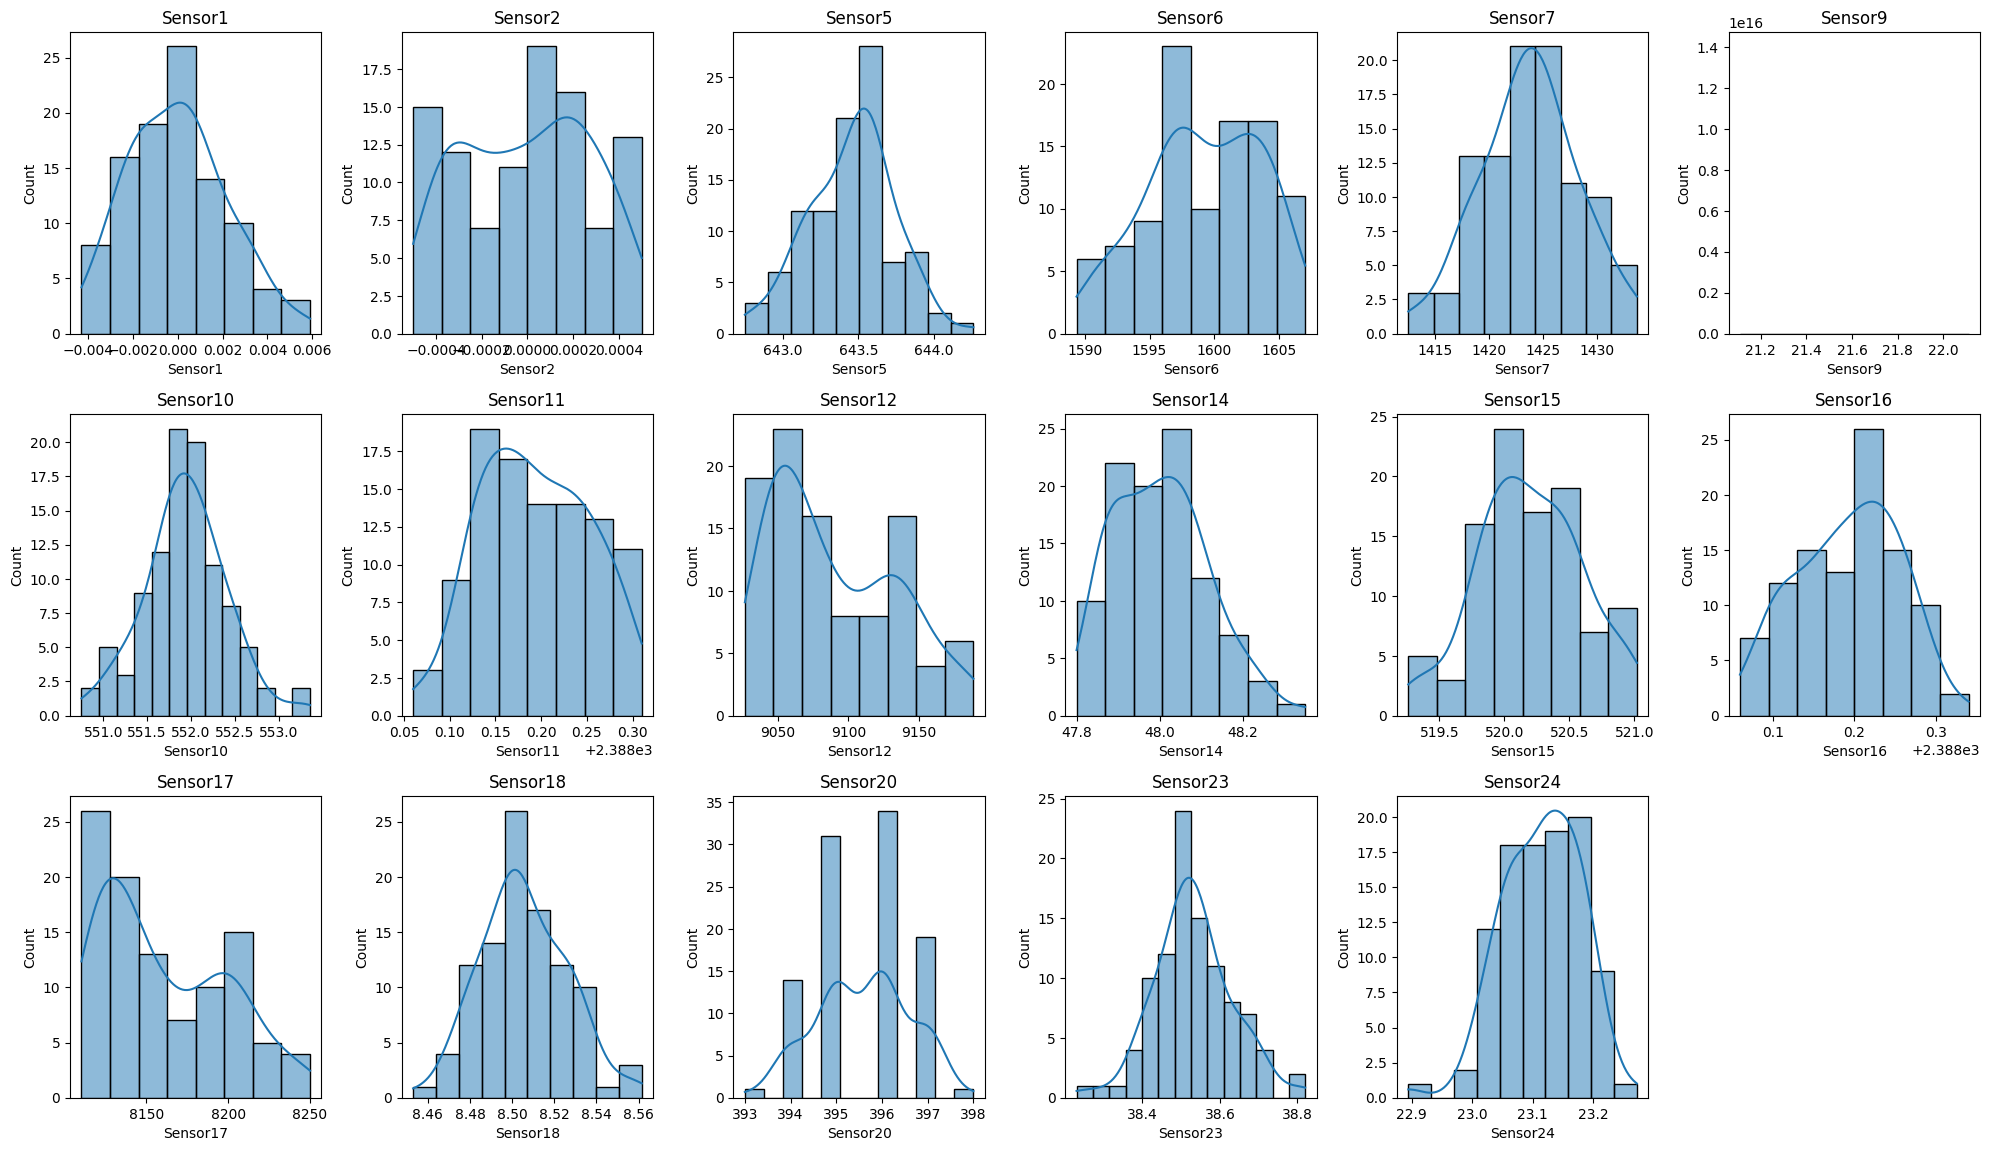

Enter 'c' to continue, 'q' to quit exploring group 11: c
Group: Remaining Cycles = 12, Size = 100
           Engine      Cycles     Sensor1     Sensor2     Sensor5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000  194.310000    0.000358    0.000058  643.430300   
std     29.011492   46.342749    0.002153    0.000280    0.286939   
min      1.000000  116.000000   -0.005000   -0.000500  642.760000   
25%     25.750000  165.000000   -0.000900   -0.000125  643.220000   
50%     50.500000  187.000000    0.000550    0.000000  643.490000   
75%     75.250000  217.250000    0.001800    0.000300  643.642500   
max    100.000000  350.000000    0.005800    0.000600  644.060000   

           Sensor6      Sensor7       Sensor9    Sensor10     Sensor11  \
count   100.000000   100.000000  1.000000e+02  100.000000   100.000000   
mean   1599.687700  1423.305400  2.161000e+01  551.928700  2388.194800   
std       4.440327     4.058196  1.071183e-14    0.516133 

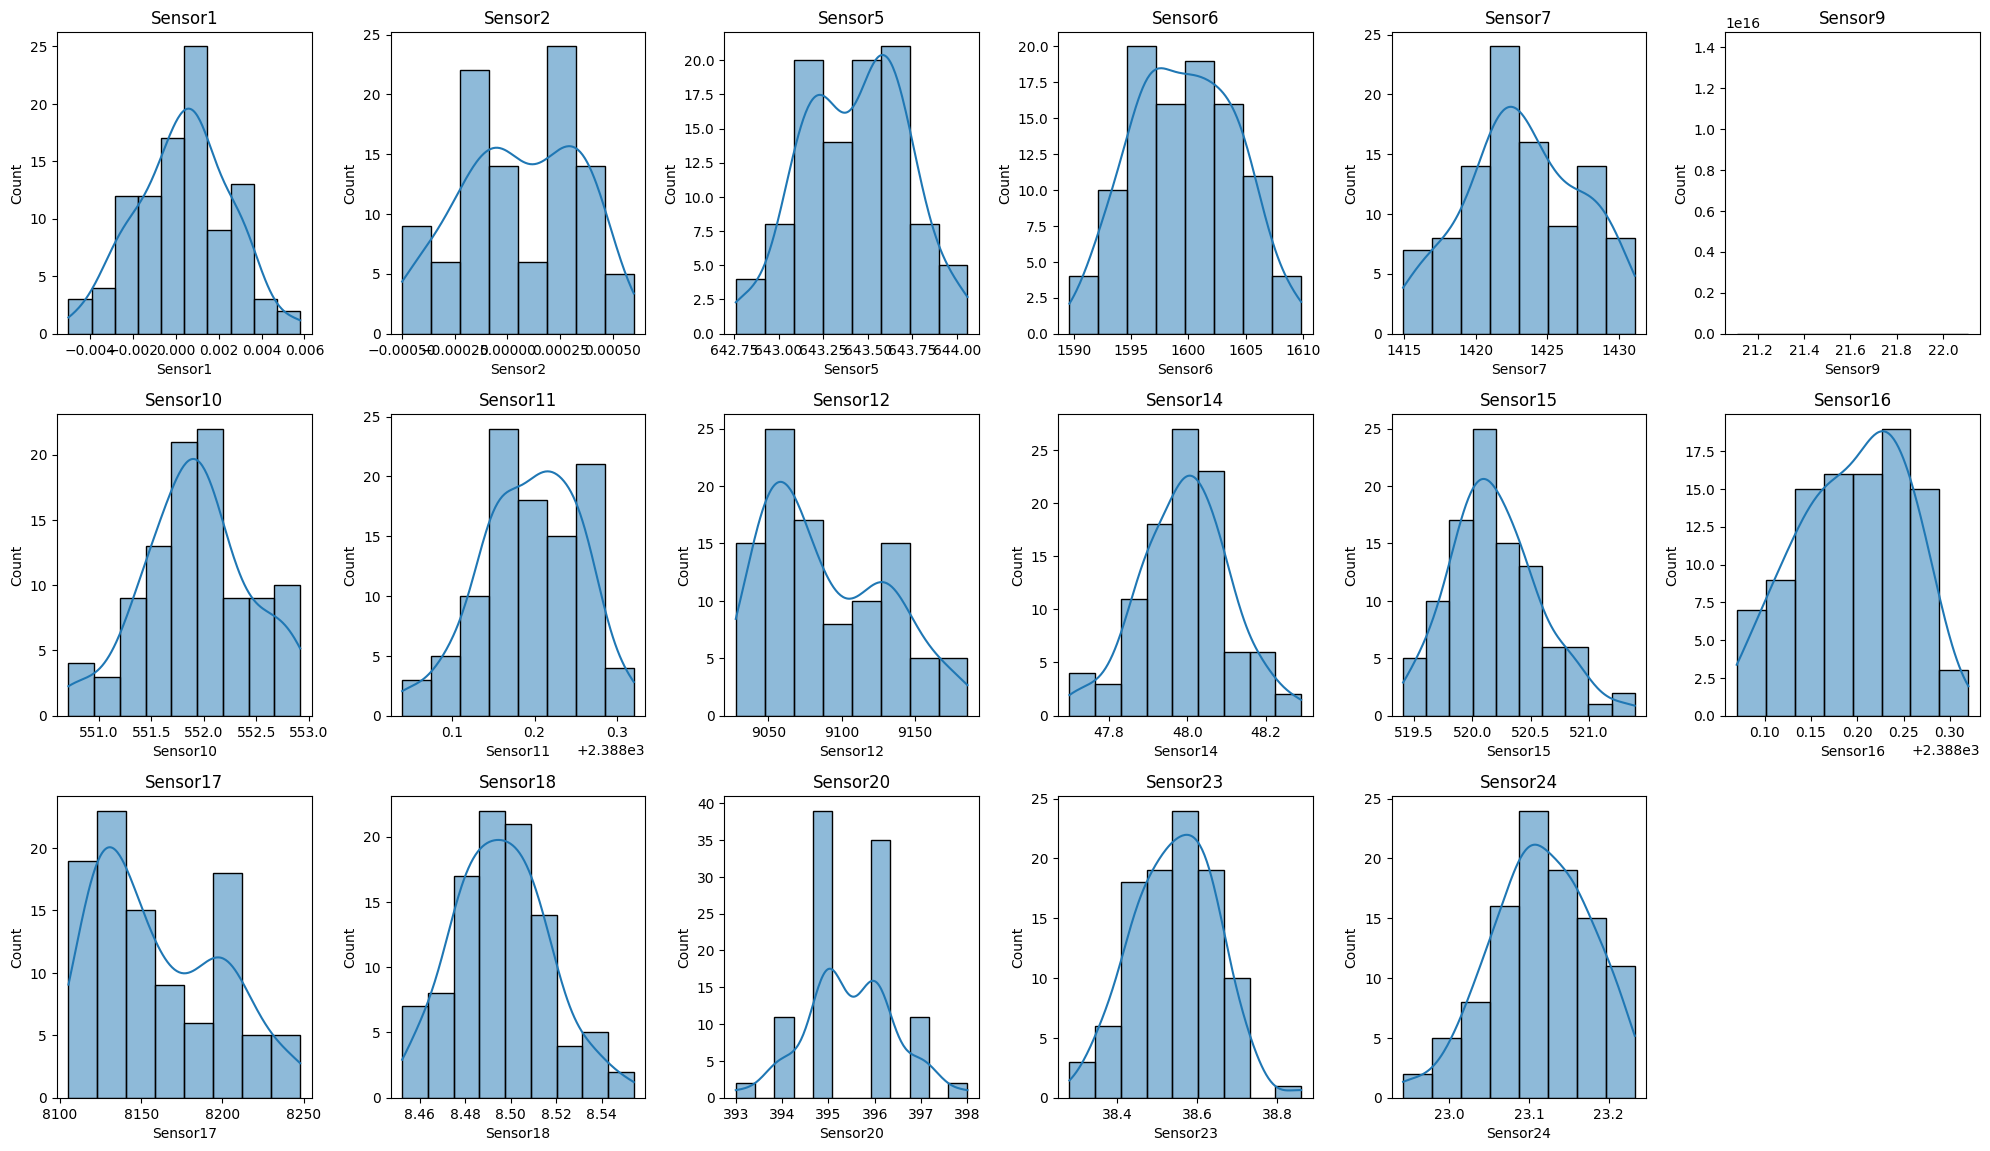

Enter 'c' to continue, 'q' to quit exploring group 12: q


In [17]:
# Group data by Remaining Cycles & explore sensor distributions
remaining_cycles_groups = data.groupby('Remaining Cycles')

# Threshold for selecting groups
threshold = 10 

# Filter groups based on the threshold
selected_groups = [(group_name, group_data) for group_name, group_data in remaining_cycles_groups if len(group_data) >= threshold]

# Explore the selected groups
for group_name, group_data in selected_groups:
    print(f"Group: Remaining Cycles = {group_name}, Size = {len(group_data)}")
    print(group_data.describe())

    plt.figure(figsize=(20, 15))
    for i, col in enumerate(group_data.columns[2:-1]):
        plt.subplot(4, 6, i+1)
        sns.histplot(group_data[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

    user_input = input(f"Enter 'c' to continue, 'q' to quit exploring group {group_name}: ")
    if user_input.lower() == 'q':
        break